# Sentiment Analysis in the Stock and Crypto Currency Market

## Introduction
Sentiment has become an emerging tool in financial markets, especially in predicting stock returns. By analyzing the polarity or tone of articles and social media posts, sentiment analysis provide insights about the investor’s behavior and market views. The main hypothesis is that public sentiment - bullish (positive) /neutral/bearish (negative) - can predicts future stock moves. 

For example, if people are very bullish about the AI outlook and the heavy computational resources, NVIDIA’s trajectory mirrors selling picks and shovels during a gold rush—providing essential AI infrastructure for industries like machine learning and gaming,. 

With the advances of technology like machine learning and especially natural language processing (NLP), analyzing sentiment data becomes easier than ever, uncovering the path of novel financial models.


## Inspiration
I want to thank [Hung Ha](https://hungha11.github.io/thefinEngineer.github.io/posts/2025/2025-02-03-llm-portfolio-optimization/) for the inspiration of my project, who published his findings on sentiment analysis on Vietnamese stocks and used LLM models to perform portfolio optimization tasks. 


## Note

Due to long time of fetching data, I put it into csv file. Users can use get_sentiment.py or get_stock_returns.py to get exactly the same csv file, located in ** data1** folder. For this notebook, data is located in **data** folder.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Data

For this project, the primary data source is Google News, accessed via its RSS feed. Google News provides a wide range of articles in the world, including the stock market and cryptocurrency market. I made many queries to gather non biased data about the tickers.

For the stock list, I choose magnificent 7( including AMZN, AAPL, MSFT, TSLA, META, GOOGL, NVDA) and Bitcoin (BTC) over 2021-2024 ( 4 years)  because they are the most “famous” stocks in the period, which outperforms the entire S&P500 and is one of the main discussion in the news, so that I can fetch rich sentiment data.

For more information, check get_sentiment.py for sentiment data and get_stock_returns for stock returns data.
For better readiness, all the comment about getting data is displayed in the document.

## Getting Data


### Sentiment Data 
***(Please run the getting data code (get_sentiment.py) in file because it takes much time)***<br>
The jupiter notebook has the imported file from csv.

#### How it works

The function will return the number of articles for each sentiment **(bullish, neutral, bearish)**, the dominant sentiment by majority ( which sentiment has the highest number) or by average (take the average scores of articles). The score is determined by TextBlob, and transformed to bullish **(>0.05)**, bearish **(<-0.025)** and neutral **(between -0.025 and 0.05)**. The reason why the bearish threshold is lower is because from 2021-2024 is the stock rally period and bad news is rare so I want to capture more bearish news ( although having lower threshold, bearish news only accounts for 15% of total news).


#### Code
The code is inspired largely by Hung Ha, who did sentiment analysis on the VIetnamese Stock Exchange. However, due to limited timeframe and computational power and unpaid plans, I cannot perform the same tasks as his team did. For that reason, I do the research on Magnificent 7 and Bitcoin and use TextBlob as a substitute to the ChatGPT o4 model.


In [2]:
# from GoogleNews import GoogleNews
# import logging
# import datetime
# from datetime import date, timedelta
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# from typing import List
# import csv
# from feedparser import parse
# from textblob import TextBlob
# import requests
# import time
# import pandas as pd
# import os

# # Setup logging
# logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# def check_internet_connection():
#     """Check if there's an internet connection by attempting to reach Google."""
#     headers = {
#         'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
#     }
#     try:
#         requests.get('http://www.google.com', headers=headers, timeout=10)
#         return True
#     except requests.RequestException:
#         return False

# class StockSentimentAnalyzer:
#     def __init__(self, bull_threshold=0.05, bear_threshold=0, days=1):
#         self.bull_threshold = bull_threshold
#         self.bear_threshold = bear_threshold
#         self.days = days

#     def load_google_news_rss(self, query: str, start_date: date):
#         """
#         Fetch news articles via Google News RSS feed with improved date handling and logging.
#         """
#         headers = {
#             'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
#         }

#         while True:
#             if not check_internet_connection():
#                 logging.warning("No internet connection. Checking again in 1 minute...")
#                 time.sleep(60)
#             else:
#                 try:
#                     from_date = start_date - timedelta(days=self.days)
#                     # Simplified RSS URL to ensure date-specific querying (Google RSS doesn't fully support 'from'/'to')
#                     rss_url = f"https://news.google.com/rss/search?q={query.replace(' ', '+')}+after:{from_date.strftime('%Y-%m-%d')}+before:{start_date.strftime('%Y-%m-%d')}&hl=en-US&gl=US&ceid=US:en"
                    
#                     logging.info(f"Fetching RSS for query: {query}, date: {start_date}")
#                     response = requests.get(rss_url, headers=headers, timeout=15)  # Increased timeout
#                     response.raise_for_status()
                    
#                     feed = parse(response.content)
#                     logging.info(f"Fetched {len(feed.entries)} articles for {query} on {start_date}")
#                     return feed.entries
#                 except requests.exceptions.Timeout:
#                     logging.warning("Request timed out. Retrying in 1 minute...")
#                     time.sleep(60)
#                 except requests.exceptions.HTTPError as e:
#                     logging.error(f"HTTP Error: {e}")
#                     time.sleep(60)
#                 except requests.exceptions.RequestException as e:
#                     logging.error(f"Request Exception: {e}")
#                     time.sleep(60)
#                 except Exception as e:
#                     logging.error(f"Unexpected error: {e}")
#                     time.sleep(60)

#     def analyze_sentiment(self, texts):
#         scores = []
#         analyzer = SentimentIntensityAnalyzer()  # Adding VADER in case
#         for text in texts:
#             blob = TextBlob(text)
#             vader_score = analyzer.polarity_scores(text)['compound']  # VADER compound score
#             scores.append(blob.sentiment.polarity)  # Keeping TextBlob 
#             logging.debug(f"Text: {text[:50]}..., TextBlob: {blob.sentiment.polarity}, VADER: {vader_score}")
#         return scores

#     def extract_key_info(self, stock: str, start_date: date):
#         """
#         Extract sentiment information for a stock for a specific start date.
#         """
#         queries = [
#             f"{stock} Outlook",
#             f"{stock} News",
#             f"{stock} Stock Analysis",
#             f"{stock} Stock Market",
#             f"{stock} Predictions",
#             f"{stock} Report"
#         ]
#         all_articles = []

#         for query in queries:
#             articles = self.load_google_news_rss(query, start_date)
#             all_articles.extend(articles)

#         # Remove duplicates based on URL and title to avoid overlap
#         unique_articles = []
#         seen = set()
#         for article in all_articles:
#             identifier = (article.get('link', ''), article.get('title', ''))
#             if identifier not in seen:
#                 unique_articles.append(article)
#                 seen.add(identifier)

#         texts = [f"{article.get('title', '')} {article.get('summary', '')}" for article in unique_articles]
#         sentiment_scores = self.analyze_sentiment(texts)

#         # Handle case with no articles
#         if not sentiment_scores:
#             logging.warning(f"No articles found for {stock} on {start_date}")
#             return {
#                 "stock": stock,
#                 "date": start_date.strftime('%Y-%m-%d'),
#                 "average_sentiment_score": 0,
#                 "dominant_sentiment_average": "neutral",
#                 "bullish_articles": 0,
#                 "bearish_articles": 0,
#                 "neutral_articles": 0,
#                 "dominant_sentiment_majority": "neutral",
#                 "num_articles_fetched": 0
#             }

#         # Sentiment analysis
#         average_sentiment_score = sum(sentiment_scores) / len(sentiment_scores)
#         dominant_sentiment_average = (
#             "bullish" if average_sentiment_score >= self.bull_threshold else 
#             "bearish" if average_sentiment_score <= self.bear_threshold else 
#             "neutral"
#         )

#         sentiments_categorical = [
#             "bullish" if score >= self.bull_threshold else 
#             "bearish" if score <= self.bear_threshold else 
#             "neutral" for score in sentiment_scores
#         ]
#         sentiment_counts = {
#             "bullish": sentiments_categorical.count("bullish"),
#             "bearish": sentiments_categorical.count("bearish"),
#             "neutral": sentiments_categorical.count("neutral")
#         }
#         dominant_sentiment_majority = max(sentiment_counts, key=sentiment_counts.get)

#         logging.info(f"{stock} {start_date}: Avg Score={average_sentiment_score}, Bull={sentiment_counts['bullish']}, Bear={sentiment_counts['bearish']}, Neutral={sentiment_counts['neutral']}")

#         return {
#             "stock": stock,
#             "date": start_date.strftime('%Y-%m-%d'),
#             "average_sentiment_score": average_sentiment_score,
#             "dominant_sentiment_average": dominant_sentiment_average,
#             "bullish_articles": sentiment_counts['bullish'],
#             "bearish_articles": sentiment_counts['bearish'],
#             "neutral_articles": sentiment_counts['neutral'],
#             "dominant_sentiment_majority": dominant_sentiment_majority,
#             "num_articles_fetched": len(unique_articles)
#         }

#     def analyze_stocks_over_range(self, stock_list: list, start_date: date, end_date: date, filename="sentiment_analysis.csv"):
#         """
#         Analyzes sentiment for each stock over the specified date range and saves to CSV.
#         """
#         results = []
#         business_days = pd.bdate_range(start=start_date, end=end_date)
        
#         for business_day in business_days:
#             current_date = business_day.date()
#             daily_results = []
#             for stock in stock_list:
#                 result = self.extract_key_info(stock, current_date)
#                 daily_results.append(result)
            
#             results.extend(daily_results)
#             logging.info(f"Finished analysis for date: {current_date.strftime('%Y-%m-%d')}, Articles: {sum(r['num_articles_fetched'] for r in daily_results)}")
        
#         local_folder = os.path.join(os.getcwd(), 'data1')
#         if not os.path.exists(local_folder):
#             os.makedirs(local_folder)
        
#         file_path = os.path.join(local_folder, filename)
#         with open(file_path, 'w', newline='', encoding='utf-8') as csvfile:
#             fieldnames = results[0].keys()
#             writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#             writer.writeheader()
#             for row in results:
#                 writer.writerow(row)

# def main():
#     logging.info("Starting main execution")
#     try:
#         mag7_stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA','BTC']
#         logging.info(f"Using stock list: {mag7_stocks}")
        
#         analyzer = StockSentimentAnalyzer(bull_threshold=0.05, bear_threshold=-0.025, days=1)
#         start_date = date(2021, 1, 1)
#         end_date = date(2021, 12, 31)
#         file_name = "sentiment_analysis_2021.csv"
        
#         analyzer.analyze_stocks_over_range(mag7_stocks, start_date, end_date, filename=file_name)
#         logging.info(f"Sentiment analysis completed and saved to {file_name}")
        
#     except Exception as e:
#         logging.error(f"An error occurred: {str(e)}")

# if __name__ == "__main__":
#     main()

#### Funtions
check_internet_connection(): Because the processing time of fetching data is extremely long, there will be time of no internet connection, the function helps users to know when that is. Although this function seems useless because the internet connection at FTU2 is extremely unstable so the function helps a lot.
<br> Output:
PS C:\python> & C:/python/.venv/Scripts/python.exe "c:/python/LTT/project1 copy 3.py"
2025-02-20 07:41:30,467 - INFO - Starting main execution
2025-02-20 07:41:30,467 - INFO - Using MAG7 stock list: ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA']
2025-02-20 07:41:48,431 - WARNING - No internet connection. Checking again in 1 minutes...
2025-02-20 07:44:23,514 - INFO - Finished analysis for date: 2021-07-01
2025-02-20 07:45:27,319 - WARNING - No internet connection. Checking again in 1 minutes...
2025-02-20 07:46:48,491 - WARNING - No internet connection. Checking again in 1 minutes...
2025-02-20 07:49:01,422 - WARNING - No internet connection. Checking again in 1 minutes...
2025-02-20 07:50:21,779 - ERROR - Request Exception: HTTPSConnectionPool(host='news.google.com', port=443): Read timed out. <br>

StockSentimentAnalyzer() Class:
load_google_news_rss(): the function is used to fetch data from google news on only the appointed date ( not from the past) with loggings to notify when the server or internet connection is wrong.
analyze_sentiment(): The function uses TextBlob (generally give scores ranging from -1 to 1 to display negative to positive sentiment) to analyze the article and give the score based on that. In case there is an error with TextBlob, the code will use analysis from Vader.<br>
extract_key_info(): The function gathers news articles for a given stock on a specific date using multiple predefined queries (e.g., "Stock Outlook"). It then analyzes sentiment, removes duplicate articles, and returns a dictionary with metrics like average sentiment score, article counts (bullish, bearish, neutral), and dominant sentiment.<br>
analyze_stocks_over_range(): Loops through the stock and dates ( using business days for simplification although BTC is traded 24/7). The results are then saved to the **data1** folder.


#### Comments
For the threshold for bullish, neutral, and bearish of TextBlob, I set 0.05,0, and -0.025 simply because from 2021 to 2024 there is a huge rally in stock price so I want the bearish threshold to be low to capture that bearish moment. Overall, most of the news is still neutral and bullish and this can be explained by the huge stock price increase from 2021-2024.
Because the code needs a huge amount of computing power, I had to divide it into 4 separate python (.py) files for running, and each one took 12 hours to run entirely for one year ( depending on internet connections and the computer’s ability). For that reason, I fetched the data before and put it in csv files for the main.ipynb to use.


### Stock Return (get_stock_returns.py)

#### How it works
The code takes data from yahoo finance, calculates daily return by taking the percentage change of the closing price, combine all the results in a dataframe and save it into csv file ( in the same data1 folder)

In [3]:
# import pandas as pd
# import yfinance as yf
# import logging
# import os
# from datetime import datetime


# # Setup logging
# logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')


# # List of MAG7 stocks and BTC
# tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'BTC-USD']


# def fetch_price_data(ticker, start_date, end_date):
#     """Fetch historical closing prices for a given ticker and truncate to date only."""
#     try:
#         stock = yf.Ticker(ticker)
#         df = stock.history(start=start_date, end=end_date)
#         if df.empty:
#             logging.warning(f"No data retrieved for {ticker}")
#             return None
       
#         # Truncate the index to date only (remove time portion)
#         df.index = df.index.date
#         df.index = pd.to_datetime(df.index)  # Convert back to datetime for consistency
       
#         return df['Close']  # Return closing prices
#     except Exception as e:
#         logging.error(f"Error fetching data for {ticker}: {str(e)}")
#         return None


# def calculate_daily_returns(ticker, start_date, end_date):
#     """Calculate daily returns for a ticker."""
#     prices = fetch_price_data(ticker, start_date, end_date)
#     if prices is None or len(prices) < 2:
#         return None
   
#     # Calculate daily percentage returns
#     daily_returns = prices.pct_change().dropna()  # Returns as decimal
#     return pd.Series(daily_returns, index=daily_returns.index, name=ticker)


# def main():
#     logging.info("Starting daily stock return calculation")
   
#     # Define date range
#     start_date = '2021-01-01'
#     end_date = '2025-01-01'  # Includes 2024 fully, adjust if needed
   
#     # Dictionary to store daily returns for each ticker
#     returns_dict = {}
   
#     # Calculate daily returns for each ticker
#     for ticker in tickers:
#         logging.info(f"Processing {ticker}")
#         daily_returns = calculate_daily_returns(ticker, start_date, end_date)
#         if daily_returns is not None:
#             returns_dict[ticker] = daily_returns
   
#     # Combine into a single DataFrame
#     returns_df = pd.DataFrame(returns_dict)
#     returns_df.index.name = 'Date'
   
#     # Define the local folder and file path
#     local_folder = os.path.join(os.getcwd(), 'data1')
#     if not os.path.exists(local_folder):
#         os.makedirs(local_folder)
#         print(f"Created folder: {local_folder}")
#     else:
#         print(f"Folder already exists: {local_folder}")
   
#     filename = 'mag7_btc_daily_returns_2021_2024.csv'
#     output_path = os.path.join(local_folder, filename)
   
#     # Save to CSV with confirmation
#     print(f"Saving CSV to: {output_path}")
#     returns_df.to_csv(output_path)
#     logging.info(f"Daily returns saved to {output_path}")
#     print(f"Daily returns saved to: {output_path}")


# if __name__ == "__main__":
#     main()

#### Functions
fetch_price_data(): fetch the daily returns of stocks using finance<br>
calculate_daily_return(): take the percentage of closing prices <br>
main(): put all the results in one dataframe and save to csv<be>


## Data Modelling

Because the method of calculating sentiment scores and seperating into bullish, neutral, and bearish has not been well-researched (due to time and knowledge limit), the results (setinment score and sentiment state) are biased in some means.

Becuase of the very long time of getting sentiment data, I fetched it and put it in csv file for easier access.

In [4]:
# Read the csv file from data folder
sentiment_df=pd.read_csv('data\\sentiment_analysis.csv')
return_df=pd.read_csv('data\\stock_return.csv')

In [5]:
sentiment_df.head()

,stock,date,average_sentiment_score,dominant_sentiment_average,bullish_articles,bearish_articles,neutral_articles,dominant_sentiment_majority,num_articles_fetched
0,AAPL,1/1/2021,0.152381,bullish,3,0,4,neutral,7
1,MSFT,1/1/2021,0.094359,bullish,5,2,6,neutral,13
2,GOOGL,1/1/2021,0.039778,neutral,2,1,12,neutral,15
3,AMZN,1/1/2021,0.193333,bullish,2,0,2,bullish,4
4,NVDA,1/1/2021,0.271333,bullish,4,0,1,bullish,5


In [6]:
return_df.head()
# Stocks are not traded on weeekends, that's why we see NaN

,Date,AAPL,MSFT,GOOGL,AMZN,NVDA,META,TSLA,BTC-USD
0,2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093726
1,2021-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020380
2,2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.024712
3,2021-01-05,0.012364,0.000965,0.008064,0.010004,0.022210,0.007548,0.007317,0.063197
4,2021-01-06,-0.033661,-0.025929,-0.009868,-0.024897,-0.058953,-0.028269,0.028390,0.083311


Now we need to merge 2 df for futher analysis, for that reasons we need to make some point in two df consistent and changing the return_df a bit in order to merge the.

In [7]:
# Rename the 'BTC-USD' column to 'BTC' in return_df
return_df = return_df.rename(columns={'BTC-USD': 'BTC'})

# Rename the 'Date' column in return_df to 'date' for consistency
return_df = return_df.rename(columns={'Date': 'date'})
# Melt return_df to long format (one row per stock per date)
return_long = return_df.melt(
    id_vars=['date'], 
    value_vars=['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'BTC'],
    var_name='stock', 
    value_name='return'
)


In [8]:
return_long.head()

,date,stock,return
0,2021-01-02,AAPL,NaN
1,2021-01-03,AAPL,NaN
2,2021-01-04,AAPL,NaN
3,2021-01-05,AAPL,0.012364
4,2021-01-06,AAPL,-0.033661


In [9]:
# Convert sentiment_df 'date' to YYYY-MM-DD
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')

In [10]:
# Merge sentiment_df with the long-format return_df on 'stock' and 'date'
merged_df = pd.merge(sentiment_df, return_long, on=['stock', 'date'], how='left')
merged_df=merged_df.dropna()

In [11]:
merged_df.to_csv("data\\merged_df.csv", index=False)

Save it in the csv for future use as the most cleaned data (because of afraid that the df may change in the code)

## Descriptive Data

Now I will write a class consting of functions used to calculate the descriptive statistics.

In [12]:
class DescriptiveData:
    def __init__(self):
        """Initialize the DescriptiveData class with no data (data will be passed to methods)."""
        self.numeric_cols = ['return', 'average_sentiment_score', 'bullish_articles', 
                           'bearish_articles', 'neutral_articles', 'num_articles_fetched']

    def is_numeric(self, value):
        """Check if a value is numeric (int or float) or can be converted to a number."""
        try:
            float(value)
            return True
        except (ValueError, TypeError):
            return False

    def extract_numeric_values(self, data, column):
        """Extract numerical values from a column in the data, skipping non-numeric entries."""
        return [float(row[column]) for row in data if column in row and row[column] and self.is_numeric(row[column])]

    def mean(self, values):
        """Calculate the mean of a list of numerical values."""
        if not values:
            return 0
        return sum(values) / len(values)

    def stdev(self, values):
        """Calculate the standard deviation of a list of numerical values."""
        if not values:
            return 0
        mean = self.mean(values)
        variance = sum((x - mean) ** 2 for x in values) / len(values)
        return (variance) ** 0.5  # Square root for standard deviation

    def median(self, values):
        """Calculate the median of a list of numerical values."""
        if not values:
            return 0
        sorted_values = sorted(values)
        n = len(sorted_values)
        if n % 2 == 0:
            return (sorted_values[n//2 - 1] + sorted_values[n//2]) / 2
        return sorted_values[n//2]

    def quartiles(self, values):
        """Calculate the first (Q1) and third (Q3) quartiles of a list of numerical values."""
        if not values or len(values) < 4:
            return 0, 0
        sorted_values = sorted(values)
        n = len(sorted_values)
        q1_pos = (n + 1) / 4
        q3_pos = 3 * (n + 1) / 4
        if q1_pos.is_integer():
            q1 = sorted_values[int(q1_pos) - 1]
        else:
            lower = int(q1_pos) - 1
            upper = lower + 1
            q1 = sorted_values[lower] + (q1_pos - lower) * (sorted_values[upper] - sorted_values[lower])
        if q3_pos.is_integer():
            q3 = sorted_values[int(q3_pos) - 1]
        else:
            lower = int(q3_pos) - 1
            upper = lower + 1
            q3 = sorted_values[lower] + (q3_pos - lower) * (sorted_values[upper] - sorted_values[lower])
        return q1, q3

    def max_min(self, values):
        """Find the maximum and minimum values of a list of numerical values."""
        if not values:
            return 0, 0
        return max(values), min(values)

    def describe(self, data, column):
        """Generate descriptive statistics for a specific column in the data, handling non-numeric data."""
        if column not in self.numeric_cols:
            unique_values = {}
            for row in data:
                if column in row and row[column] and row[column] != '':
                    value = row[column]
                    unique_values[value] = unique_values.get(value, 0) + 1
            return f"Non-numeric column '{column}' has {len(unique_values)} unique values: {dict(list(unique_values.items())[:5]) if unique_values else 'None'}"
        
        values = self.extract_numeric_values(data, column)
        if not values:
            return f"No numerical data found for column '{column}'."
        
        stats = {
            'Mean': self.mean(values),
            'Standard Deviation': self.stdev(values),
            'Median': self.median(values),
            'Q1': self.quartiles(values)[0],
            'Q3': self.quartiles(values)[1],
            'Max': self.max_min(values)[0],
            'Min': self.max_min(values)[1]
        }
        return stats

    def _format_table_row(self, headers, data, delimiter=' | ', padding=2):
        """Format a row for a text-based table with alignment."""
        # Find the maximum width for each column
        widths = [max(len(str(h)), max(len(str(d[i])) for d in data + [headers])) for i, h in enumerate(headers)]
        # Format the header and data rows
        header = delimiter.join(f"{h:>{w}}" for h, w in zip(headers, widths))
        rows = [delimiter.join(f"{str(d[i]):>{w}}" for i, w in enumerate(widths)) for d in data]
        # Add a separator line
        separator = delimiter.join('-' * w for w in widths)
        return header, separator, rows

    def print_stats(self, data):
        """Print all statistics (non-numerical and numerical) for the dataset in a table format, handling non-numeric data first."""
        print("\n=== Descriptive Statistics for Dataset ===")
        
        # Handle non-numerical columns first
        non_numeric_cols = [col for col in [row.keys() for row in data][0] if col not in self.numeric_cols]
        if non_numeric_cols:
            print("\nNon-Numerical Columns Summary:")
            headers = ["Column", "Unique Values (Top 5)"]
            table_data = []
            for col in non_numeric_cols:
                result = self.describe(data, col)
                if isinstance(result, str):
                    parts = result.split(": ")
                    column_name = parts[0].replace("Non-numeric column ", "")
                    unique_info = parts[1] if len(parts) > 1 else "None"
                    table_data.append([column_name, unique_info])
            if table_data:
                header, separator, rows = self._format_table_row(headers, table_data)
                print(header)
                print(separator)
                for row in rows:
                    print(row)

        # Then handle numerical columns
        print("\nNumerical Columns Statistics:")
        headers = ["Column", "Mean", "Std Dev", "Median", "Q1", "Q3", "Max", "Min"]
        table_data = []
        for col in self.numeric_cols:
            stats = self.describe(data, col)
            if isinstance(stats, str):  # Handle no numerical data message
                table_data.append([col, "N/A", "N/A", "N/A", "N/A", "N/A", "N/A", "N/A"])
            else:
                table_data.append([
                    col,
                    f"{stats['Mean']:.4f}",
                    f"{stats['Standard Deviation']:.4f}",
                    f"{stats['Median']:.4f}",
                    f"{stats['Q1']:.4f}",
                    f"{stats['Q3']:.4f}",
                    f"{stats['Max']:.4f}",
                    f"{stats['Min']:.4f}"
                ])
        if table_data:
            header, separator, rows = self._format_table_row(headers, table_data)
            print(header)
            print(separator)
            for row in rows:
                print(row)

In [13]:
if isinstance(merged_df, pd.DataFrame):
    merged_df = merged_df.to_dict(orient='records')
desdata = DescriptiveData()
desdata.print_stats(merged_df)


=== Descriptive Statistics for Dataset ===

Non-Numerical Columns Summary:
                                           Column | Unique Values (Top 5)
------------------------------------------------- | ---------------------
                      'stock' has 8 unique values |                {'BTC'
                    'date' has 1042 unique values |         {'2021-01-04'
 'dominant_sentiment_average' has 3 unique values |            {'neutral'
'dominant_sentiment_majority' has 3 unique values |            {'neutral'

Numerical Columns Statistics:
                 Column |    Mean | Std Dev |  Median |      Q1 |      Q3 |      Max |     Min
----------------------- | ------- | ------- | ------- | ------- | ------- | -------- | -------
                 return |  0.0012 |  0.0276 |  0.0011 | -0.0120 |  0.0143 |   0.2437 | -0.2639
average_sentiment_score |  0.0647 |  0.0466 |  0.0602 |  0.0352 |  0.0899 |   0.4000 | -0.2600
       bullish_articles | 10.5518 |  9.1402 |  8.0000 |  5.0000 | 13.

####  COMMENT

The code check if the merged_df is a DataFrame, if so it will transforms merged_df into dictionary for better implementation

The average return is 0.12% per day or 35% a year, which is extremely high. However, the standard deviation is even higher , 43% annulized ( multiply by sqrt(252)). This shows that mag7 stocks and btc are very volatile but may deliver spectacular return

The average sentiment score is 0.065, quite above the 0.05 threshold of positive, which can be explained by the stock rally from 2023-2024. However, the standard deviation is very high, which means that there are days of extreme bearish news.

About 31 articles are fethced a day for a single stock, this number is not high, but it is enough to cover the overall sentiment that day. The standard deviation is very high, which indicates that there will be more articles in more volatile day. Out of 31 articles, more than half are neutral, which make some senses because there can not be exciting news everyday. Bullish articles captures almost of the rest and bullish articles is very minor.

## Data Visulization

In [14]:
# Reload the merged_df for right and clean data
merged_df=pd.read_csv('data\\merged_df.csv')

### Graph 1: Daily Sentiment and Daily Return of BTC

In [15]:
# Create subplot with 2 y-axes
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Filter AAPL data (assuming same dataframe structure)
aapl = merged_df[merged_df['stock'] == 'BTC'].dropna(subset=['return'])

# Add sentiment score trace (left y-axis)
fig.add_trace(
    go.Scatter(
        x=aapl['date'],
        y=aapl['average_sentiment_score'],
        name='Avg Sentiment Score',
        mode='lines+markers',
        line=dict(color='blue'),
        marker=dict(size=8)
    ),
    secondary_y=False
)

# Add returns trace (right y-axis)
fig.add_trace(
    go.Scatter(
        x=aapl['date'],
        y=aapl['return']*100,
        name='Daily Return (%)',
        mode='lines',
        line=dict(color='orange', dash='dash')
    ),
    secondary_y=True
)

# Update layout
fig.update_layout(
    title_text='BTC: Sentiment Score vs. Daily Returns Over Time',
    width=1000,
    height=500,
    xaxis_title='Date',
    legend=dict(
        yanchor="top",
        y=1.1,
        xanchor="left",
        x=0.01
    ),
    grid=dict(
        rows=1,
        columns=1
    )
)

# Update axes
fig.update_yaxes(
    title_text='Average Sentiment Score',
    color='blue',
    secondary_y=False
)
fig.update_yaxes(
    title_text='Daily Return (%)',
    color='orange',
    secondary_y=True
)

# Show plot
fig.show()

Comment: We can see that the daily returns and sentiment scores of BTC are somewhat moderate in correlations. However, the extreme big sentiment score does not means with extreme returns, this suggest further tuning the way to classify sentiments and calculating sentiment scores.

### Graph 2: Sentiment vs Returns for All Stocks

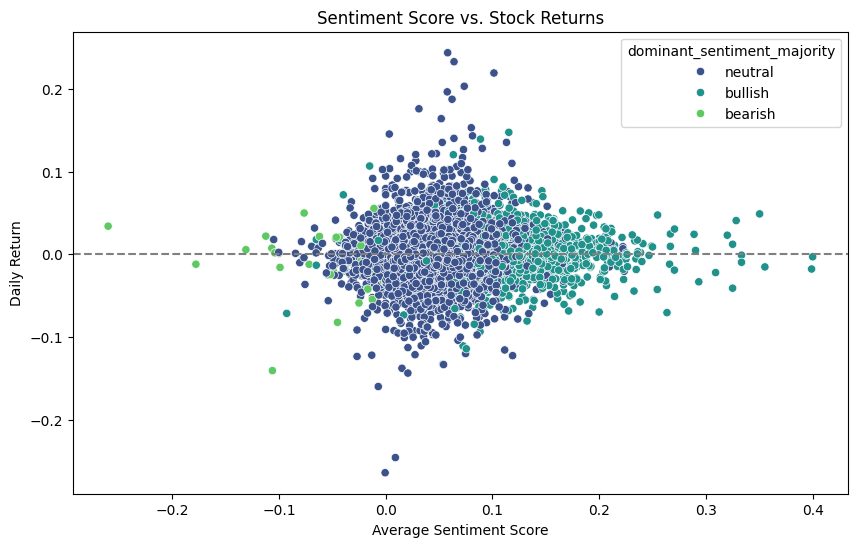

In [16]:
# Graph 2: Scatter Plot of Sentiment Score vs. Returns (All Stocks)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='average_sentiment_score', y='return', hue='dominant_sentiment_majority', palette='viridis')
plt.title('Sentiment Score vs. Stock Returns')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Daily Return')
plt.axhline(0, color='gray', linestyle='--')

Comment: Overall, good sentiments correlates with good returns and vice versa

### Graph 3: Distribution of Dominant Sentiment

Text(0, 0.5, 'Count')

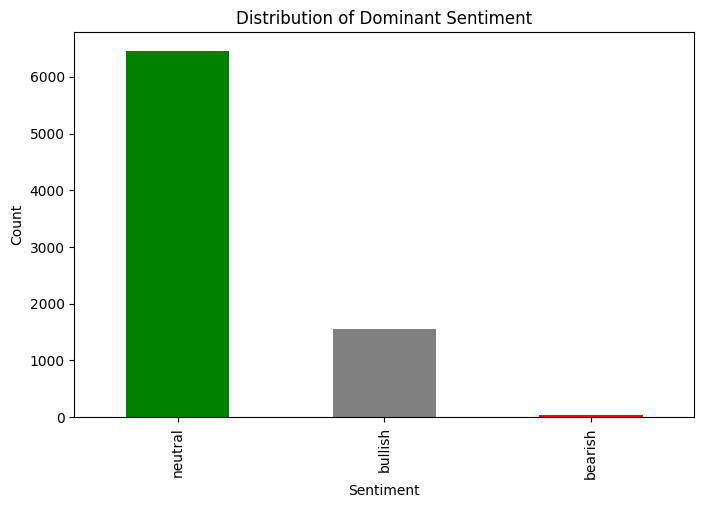

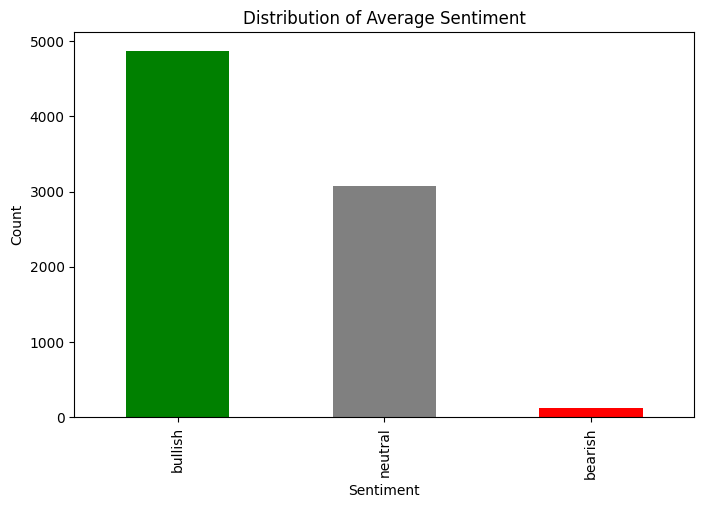

In [17]:
# Graph 3: Dominant Sentiment Distribution
plt.figure(figsize=(8, 5))
merged_df['dominant_sentiment_majority'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Distribution of Dominant Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Graph 3: Dominant Sentiment Distribution
plt.figure(figsize=(8, 5))
merged_df['dominant_sentiment_average'].value_counts().plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Distribution of Average Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')


Comment: Overall, the major sentiment for the day is rarely bearish whether it is calculated using average or majority. Although neutral articles are the most popular overall ( in descriptive data) but when taking the majority for each day, bullish article still remained dominant. The number of neutral article is largely increased in the average sentiment method.

### Graph 4: Correlation Matrix Heatmap

In [18]:
return_df=pd.read_csv('data\\stock_return.csv')

In [19]:
# Create a copy of the DataFrame to avoid modifying the original
df_heatmap = return_df.copy()

# Drop the 'date' column as it's not needed for the correlation matrix
df_heatmap = df_heatmap.drop('Date', axis=1)

# Drop rows with NaN values
df_heatmap = df_heatmap.dropna()

# Calculate the correlation matrix
correlation_matrix = df_heatmap.corr()

# Create the heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='RdBu',  
    zmin=-1,  # Set the minimum value for correlation (-1)
    zmax=1   # Set the maximum value for correlation (1)
))

# Update layout for better visualization
fig.update_layout(
    title='Correlation Matrix Heatmap',
    xaxis_title='Stocks',
    yaxis_title='Stocks',
    width=800,  
    height=600, 
)

# Show the plot
fig.show()

### Graph 5: Cummulative Return of stock

In [20]:
# Create a copy of the DataFrame to avoid modifying the original
df_cumulative = return_df.copy()
df_cumulative=df_cumulative.set_index('Date')

# Drop rows with NaN values
df_cumulative = df_cumulative.dropna()

# Calculate cumulative returns
cumulative_returns = (1 + df_cumulative).cumprod() - 1

# Create the plot
fig = go.Figure()

# Add traces for each stock
for column in cumulative_returns.columns:
    fig.add_trace(go.Scatter(x=cumulative_returns.index, y=cumulative_returns[column], mode='lines', name=column))

# Update layout for better visualization
fig.update_layout(
    title='Cumulative Returns Over Time',
    xaxis_title='Date Index',
    yaxis_title='Cumulative Return',
    width=1000,
    height=600,
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01
    )
)

# Show the plot
fig.show()

Comment: The chart shows cumulative returns from July 2021 to July 2024 for the "Magnificent 7" stocks and Bitcoin, with NVIDIA (NVDA) leading dramatically, reaching a 10x return by mid-2024. Fueled by its GPUs’ critical role in the AI revolution, NVIDIA outperforms AAPL, MSFT, GOOGL, AMZN, NVDA, META, TSLA, and BTC-USD, which show steady but lesser gains. NVIDIA’s trajectory mirrors selling picks and shovels during a gold rush—providing essential AI infrastructure for industries like machine learning and gaming, ensuring sustained demand and outsized growth as the AI boom intensifies, though sustainability remains a question.

### Graph 6: Box Plot of Returns by Sentiment

C:\Users\caoqu\AppData\Local\Temp\ipykernel_16268\2981836530.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




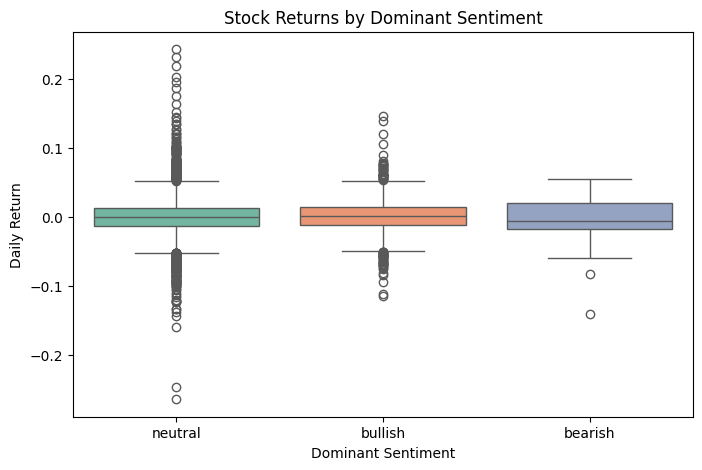

C:\Users\caoqu\AppData\Local\Temp\ipykernel_16268\2981836530.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




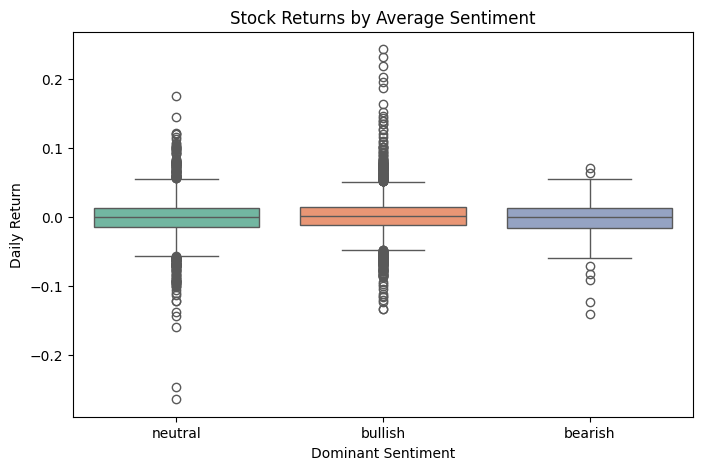

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='dominant_sentiment_majority', y='return', palette='Set2')
plt.title('Stock Returns by Dominant Sentiment')
plt.xlabel('Dominant Sentiment')
plt.ylabel('Daily Return')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='dominant_sentiment_average', y='return', palette='Set2')
plt.title('Stock Returns by Average Sentiment')
plt.xlabel('Dominant Sentiment')
plt.ylabel('Daily Return')
plt.show()

Comment: It is clear that when the sentiment is bullish, the majority of the return is positive however, many are negative. The story is the same for bearish sentiment score. 
However, in dominant majority method, many extreme returns are captured in neutral scores, which raises the question of calculating the score and further develop the model

### Graph 7: Overall Correlation Matrix 

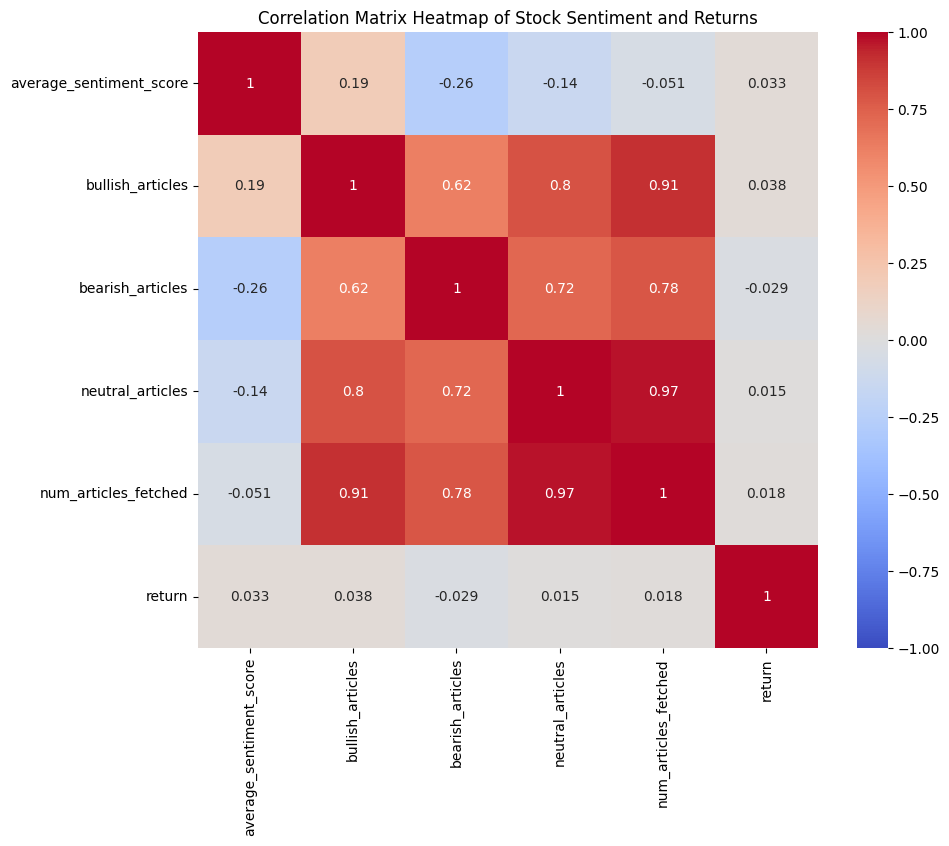

In [22]:
# Parse the string data into a DataFrame
df = merged_df.copy()

# Select numerical columns for correlation
numerical_cols = ['average_sentiment_score', 'bullish_articles', 'bearish_articles', 
                  'neutral_articles', 'num_articles_fetched', 'return']
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap of Stock Sentiment and Returns')
plt.show()

Comment: Suprisingly, return is not highly correlated with any other input. 

# Model

## Random Classification

### Helper Function

I will code Random Forest Helper class to modify functions according to my uses.

In [23]:
class RandomForestHelper:
    def train_test_split(self, X, y, test_size=0.2, random_seed=None):
        """Split data into training and testing sets"""
        # Convert to lists if pandas objects are provided
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X = X.values.tolist() if isinstance(X, pd.Series) else X.values.tolist()
        if isinstance(y, pd.Series):
            y = y.values.tolist()

        if not X or not y or len(X) != len(y):
            raise ValueError("X and y must be non-empty and have the same length")

        n = len(X)

        # Simple randomization without libraries, using Python's random if available, or a deterministic shuffle
        if random_seed is not None:
            # Use a deterministic shuffle based on random_seed (no external libraries)
            for i in range(random_seed % n):  # Limit iterations to avoid excessive shuffling
                j = i % n  # Ensure j is within bounds
                if j > 0 and random_seed % (j + 1) == 0:  # Avoid negative indices
                    X[j], X[j-1] = X[j-1], X[j]  # Swap elements
                    if y:
                        y[j], y[j-1] = y[j-1], y[j]  # Sync shuffle with y

        test_size = int(n * test_size)
        if test_size >= n:
            test_size = n - 1  # Ensure at least one sample in training set

        test_indices = list(range(n - test_size, n))
        train_indices = list(range(n - test_size))

        X_train = [X[i] for i in train_indices]
        X_test = [X[i] for i in test_indices]
        y_train = [y[i] for i in train_indices]
        y_test = [y[i] for i in test_indices]

        # Convert back to pandas objects if input was pandas
        if isinstance(merged_df, pd.DataFrame) or isinstance(merged_df, pd.Series):  # Assuming merged_df as reference
            X_train = pd.DataFrame(X_train, columns=X.columns) if isinstance(X, pd.DataFrame) else pd.Series(X_train)
            X_test = pd.DataFrame(X_test, columns=X.columns) if isinstance(X, pd.DataFrame) else pd.Series(X_test)
            y_train = pd.Series(y_train)
            y_test = pd.Series(y_test)

        return X_train, X_test, y_train, y_test

    def evaluate(self, y_true, y_pred):
        """Evaluate model performance with accuracy, precision, recall, and F1 score for multiclass."""
        if isinstance(y_true, (pd.Series, np.ndarray)):
            y_true = y_true.tolist()
        if isinstance(y_pred, (pd.Series, np.ndarray)):
            y_pred = y_pred.tolist()

        
        if not y_true or not y_pred or len(y_true) != len(y_pred):
            return {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0}
        
        # Simple multiclass evaluation (assuming classes -1, 0, 1)
        correct = sum(1 for i in range(len(y_true)) if y_true[i] == y_pred[i])
        accuracy = correct / len(y_true)
        
        # Precision, Recall, F1 (average over classes)
        classes = [-1, 0, 1]
        precision = {c: 0 for c in classes}
        recall = {c: 0 for c in classes}
        f1 = {c: 0 for c in classes}  # Initialize f1 dictionary
        tp = {c: 0 for c in classes}  # True Positives
        fp = {c: 0 for c in classes}  # False Positives
        fn = {c: 0 for c in classes}  # False Negatives
        
        for i in range(len(y_true)):
            true_class = y_true[i]
            pred_class = y_pred[i]
            if true_class == pred_class:
                tp[true_class] += 1
            else:
                fp[pred_class] += 1
                fn[true_class] += 1
        
        for c in classes:
            precision[c] = tp[c] / (tp[c] + fp[c]) if (tp[c] + fp[c]) > 0 else 0
            recall[c] = tp[c] / (tp[c] + fn[c]) if (tp[c] + fn[c]) > 0 else 0
            f1[c] = 2 * (precision[c] * recall[c]) / (precision[c] + recall[c]) if (precision[c] + recall[c]) > 0 else 0
        
        avg_precision = sum(precision.values()) / len(classes) if classes else 0
        avg_recall = sum(recall.values()) / len(classes) if classes else 0
        avg_f1 = sum(f1.values()) / len(classes) if classes else 0
        
        return {
            'accuracy': accuracy,
            'precision': avg_precision,
            'recall': avg_recall,
            'f1': avg_f1
        }

    def plot_feature_importance(self, feature_names, importance):
        """Text-based plot of feature importance (top 5 for simplicity)."""
        if not feature_names or not importance or len(feature_names) != len(importance):
            print("No features to plot.")
            return
        
        # Sort by importance
        pairs = list(zip(feature_names, importance))
        pairs.sort(key=lambda x: x[1], reverse=True)
        top_5 = pairs[:5]
        
        print("\nFeature Importance (Top 5):")
        max_len = max(len(name) for name, _ in top_5)
        for name, imp in top_5:
            bars = int(imp * 20)  # Simple scaling for ASCII bars
            bar = '#' * bars
            print(f"{name:<{max_len}} | {imp:.4f} | {bar}")

### Data Preparation


I see that having the absolute bullish article itself does not provide much economic meaning as taking proportion over all articles. 

Because the final purposes of predicting stock returns is to take actions on whether to buy or sell the stock, I will split it into -1,0,1 for returns ranging from -0.5,0,0.5 for easier actions taking.

In [24]:
# Convert date column to datetime
data=merged_df.copy()
data['date'] = pd.to_datetime(data['date'])

# Sort data by stock and date to ensure correct order (not shifting)
data = data.sort_values(['stock', 'date'])
# Transform article counts into percentages of total articles (using pandas)
data['%_bullish_articles'] = (data['bullish_articles'] / data['num_articles_fetched']) * 100
data['%_bearish_articles'] = (data['bearish_articles'] / data['num_articles_fetched']) * 100
data['%_neutral_articles'] = (data['neutral_articles'] / data['num_articles_fetched']) * 100

# Handle cases where num_articles_fetched is 0 to avoid division by zero (using pandas)
data['%_bullish_articles'] = data['%_bullish_articles'].fillna(0)
data['%_bearish_articles'] = data['%_bearish_articles'].fillna(0)
data['%_neutral_articles'] = data['%_neutral_articles'].fillna(0)
# Verify the percentages sum to 100% (or close, accounting for rounding/float precision)
data['%_total_articles'] = data['%_bullish_articles'] + data['%_bearish_articles'] + data['%_neutral_articles']

# Categorize returns into classes: >0.5% → 1, -0.5% to 0.5% → 0, <-0.5% → -1
# Note: Assuming 'return' is in decimal form (e.g., 0.005 = 0.5%), so multiply by 100 for percentage
data['return_class'] = pd.cut(data['return'] * 100, bins=[-float('inf'), -0.5, 0.5, float('inf')], 
                             labels=[-1, 0, 1], include_lowest=True)

I exclude non-used columns in X and split it into train(80%) and test (20%) set.

In [25]:
# Separate features (X) and target (y) without shifting
X = data.drop(columns=['date', 'return', 'return_class', 'bullish_articles', 'bearish_articles', 
                      'neutral_articles', 'num_articles_fetched', '%_total_articles'])  # Exclude original counts and totals
y = data['return_class']
# Split X,y into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Model Execution

Because the data consists of non-numerical columns, I have to seperate them into dummy variable in order for the model to run. Also, to make the calculation part faster and more efficient, I use StandardScaler() to make number have zero mean and unit variance.

In order to prevent overfitting, I set the pipline with simple parameters.

Final Model

X include ['stock', 'dominant_sentiment_average', 'dominant_sentiment_majority'] (categorical) 
and ['average_sentiment_score', '%_bullish_articles', '%_bearish_articles', '%_neutral_articles'] (numerical)

Y is the set [-1,0,1], representing the stock return

Because of the complicated and computational resources that need to use in Random Forest Classification and GridSearch, I do not write code for them but rather use the library

In [26]:
## Define categorical and numerical columns with new percentage features
categorical_cols = ['stock', 'dominant_sentiment_average', 'dominant_sentiment_majority']
numerical_cols = ['average_sentiment_score', '%_bullish_articles', '%_bearish_articles', '%_neutral_articles']

#  Create preprocessing steps 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)  # One-hot encoding for categorical variables
    ])
# Create a pipeline with preprocessing and the classifier 
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=5, 
                                 min_samples_leaf=2, max_features='sqrt', random_state=42, 
                                 n_jobs=-1, oob_score=True))
])

I used Grid Search to find for me best paramters of the model

In [27]:
param_grid = {
    'rf__n_estimators': [10, 20, 30, 50],
    'rf__max_depth': [5, 10, 15],
    'rf__min_samples_split': [5, 10, 20],
    'rf__min_samples_leaf': [2, 5, 10]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

c:\python\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['average_sentiment_score',
                                                                          '%_bullish_articles',
                                                                          '%_bearish_articles',
                                                                          '%_neutral_articles']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['stock',
                                                                          'dominant_sentiment_average',
                                                                          'dominant_sentiment_majority'])])),
                                       ('rf',
                                        RandomForestClassifier(max_depth=15,
                                                               min_samples_leaf=2,
                                                               min_samples_split=5,
                                                               n_jobs=-1,
                                                               oob_score=True,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [5, 10, 15],
                         'rf__min_samples_leaf': [2, 5, 10],
                         'rf__min_samples_split': [5, 10, 20],
                         'rf__n_estimators': [10, 20, 30, 50]},
             scoring='f1_weighted')

In [28]:
print("Best parameters:", grid_search.best_params_)
best_pipeline = grid_search.best_estimator_

Best parameters: {'rf__max_depth': 15, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 5, 'rf__n_estimators': 10}


In [29]:
# Make predictions for train and test sets using the best model
y_train_pred = best_pipeline.predict(X_train)
y_test_pred = best_pipeline.predict(X_test)

### Model Evaluation

In [30]:
# Use RandomForestHelper for evaluation
rf_helper = RandomForestHelper()
train_metrics = rf_helper.evaluate(y_train, y_train_pred)
test_metrics = rf_helper.evaluate(y_test, y_test_pred)

# Print metrics using RandomForestHelper's evaluation
print("Training Set Metrics:")
print(f'Accuracy: {train_metrics["accuracy"]:.4f}')
print(f'Precision (weighted): {train_metrics["precision"]:.4f}')
print(f'Recall (weighted): {train_metrics["recall"]:.4f}')
print(f'F1-Score (weighted): {train_metrics["f1"]:.4f}\n')

print("Test Set Metrics:")
print(f'Accuracy: {test_metrics["accuracy"]:.4f}')
print(f'Precision (weighted): {test_metrics["precision"]:.4f}')
print(f'Recall (weighted): {test_metrics["recall"]:.4f}')
print(f'F1-Score (weighted): {test_metrics["f1"]:.4f}')

Training Set Metrics:
Accuracy: 0.7317
Precision (weighted): 0.7590
Recall (weighted): 0.6890
F1-Score (weighted): 0.7022

Test Set Metrics:
Accuracy: 0.4108
Precision (weighted): 0.3683
Recall (weighted): 0.3635
F1-Score (weighted): 0.3572


#### Comment
We see that although we try to prevent overfitting but the model is extremely overfitted. Rge accuracy and F1-Score in the train set is almost doubled that in the test set. Due to the learning goal of this class, improving the model to prevent overfiting is not the main priorities as doing so require more expirtise and understanding.

In [31]:
# Print detailed classification report for test set
print("\nDetailed Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=['Negative (-1)', 'Neutral (0)', 'Positive (1)']))


Detailed Classification Report (Test Set):
               precision    recall  f1-score   support

Negative (-1)       0.41      0.43      0.42       595
  Neutral (0)       0.25      0.12      0.17       338
 Positive (1)       0.44      0.54      0.49       681

     accuracy                           0.41      1614
    macro avg       0.37      0.36      0.36      1614
 weighted avg       0.39      0.41      0.39      1614



#### Confusion Matrices

In [32]:
def plot_confusion_matrix(y_true_train, y_pred_train,y_true_test,y_pred_test):
        """Compute the confusion matrix for a list of true values and predicted values."""
        plt.figure(figsize=(12, 5))

        # Train Set Confusion Matrix
        plt.subplot(1, 2, 1)
        cm_train = confusion_matrix(y_true_train, y_pred_train)
        sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'],
                    yticklabels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'])
        plt.title('Train Set: Confusion Matrix', fontsize=14)
        plt.xlabel('Predicted', fontsize=12)
        plt.ylabel('Actual', fontsize=12)
            # Test Set Confusion Matrix
        plt.subplot(1, 2, 2)
        cm_test = confusion_matrix(y_true_test, y_pred_test)
        sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', 
                    xticklabels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'],
                    yticklabels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'])
        plt.title('Test Set: Confusion Matrix', fontsize=14)
        plt.xlabel('Predicted', fontsize=12)
        plt.ylabel('Actual', fontsize=12)

        plt.tight_layout()
        plt.show()

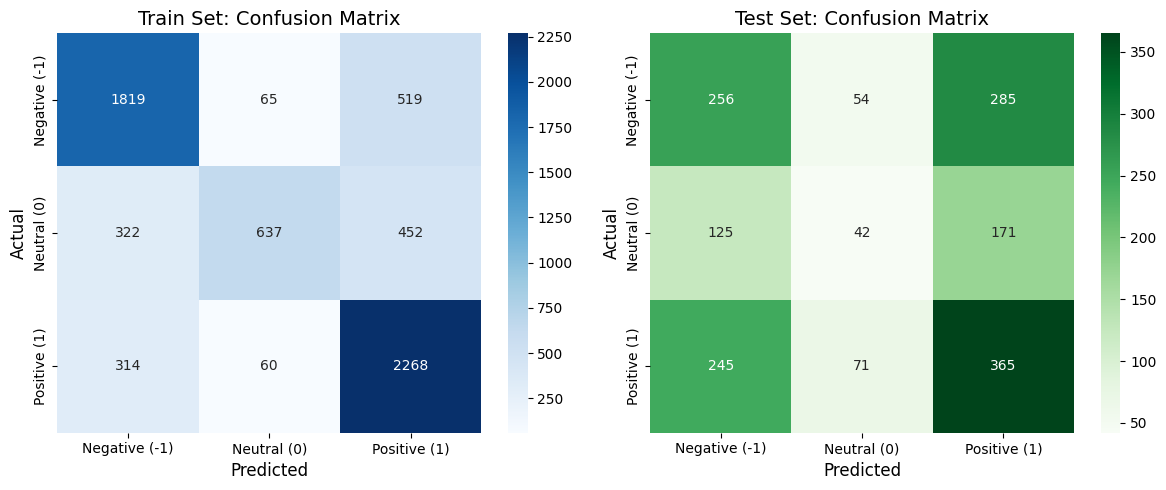

In [33]:
plot_confusion_matrix(y_train, y_train_pred, y_test, y_test_pred)

#### Comment
In the train set, many predictions are corrected ( as the precision metric presented above) with very few misclassifications

On the other hand, most of the predictions in test set are Positive ( even there are more positive than negative predictions when the return is actually bearish). This aligns with the overfitting problem I discussed before.

#### F1-Score over training period

To determine how the model is performing as the epochs increase and is it really that the model is overfitting, I will draw the F-1 Score for the process

c:\python\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

c:\python\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

c:\python\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

c:\python\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.

c:\python\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimat

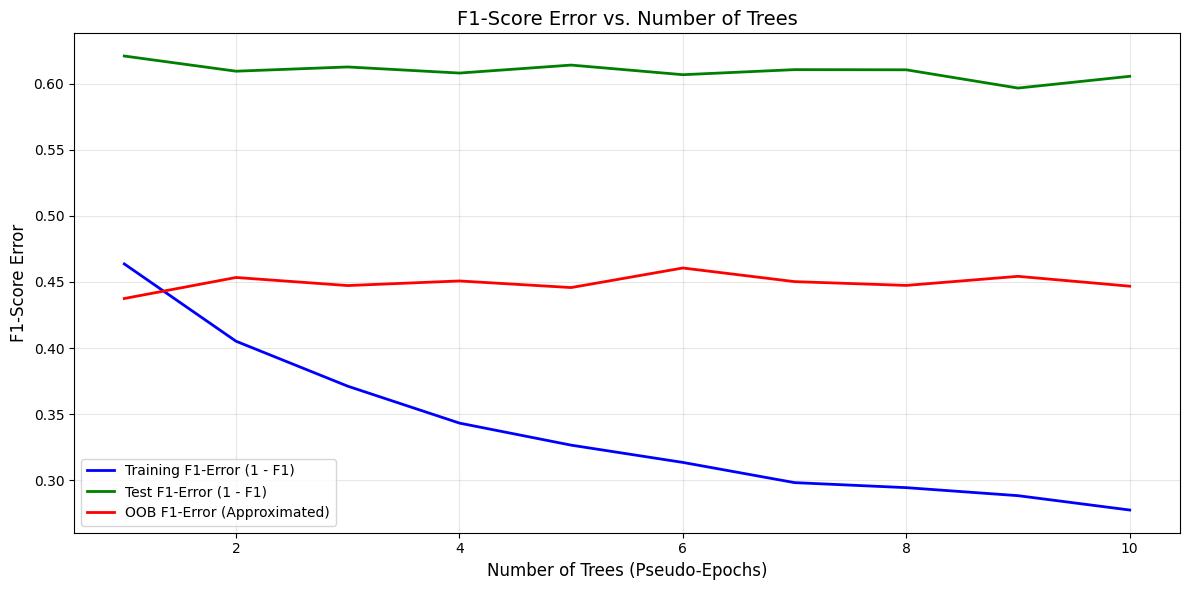

In [34]:
# Enhanced simulation of classification error (1 - accuracy) and F1-score error over number of trees
n_estimators = best_pipeline.named_steps['rf'].n_estimators
train_error_over_trees = []
test_error_over_trees = []
train_f1_over_trees = []
test_f1_over_trees = []
oob_error_over_trees = [] if hasattr(best_pipeline.named_steps['rf'], 'oob_score_') else None

for n in range(1, n_estimators + 1):
    # Create a temporary pipeline with the same preprocessing and a RandomForestClassifier with fewer trees
    rf_temp = Pipeline([
        ('preprocessor', best_pipeline.named_steps['preprocessor']),
        ('rf', RandomForestClassifier(n_estimators=n, 
                                     max_depth=best_pipeline.named_steps['rf'].max_depth,
                                     min_samples_split=best_pipeline.named_steps['rf'].min_samples_split,
                                     min_samples_leaf=best_pipeline.named_steps['rf'].min_samples_leaf,
                                     max_features=best_pipeline.named_steps['rf'].max_features,
                                     random_state=42, n_jobs=-1, oob_score=True, 
                                     class_weight=best_pipeline.named_steps['rf'].class_weight))
    ])
    rf_temp.fit(X_train, y_train)
    
    # Train error (1 - accuracy)
    y_train_pred_temp = rf_temp.predict(X_train)
    train_error_over_trees.append(1 - accuracy_score(y_train, y_train_pred_temp))
    
    # Test error (1 - accuracy)
    y_test_pred_temp = rf_temp.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred_temp)
    test_error_over_trees.append(1 - accuracy_score(y_test, y_test_pred_temp))
    
    # Train F1-score error (1 - F1, weighted)
    train_f1_over_trees.append(1 - f1_score(y_train, y_train_pred_temp, average='weighted'))
    
    # Test F1-score error (1 - F1, weighted)
    test_f1_over_trees.append(1 - f1_score(y_test, y_test_pred_temp, average='weighted'))
    
    # OOB error (1 - OOB accuracy) if available
    if hasattr(rf_temp.named_steps['rf'], 'oob_score_'):
        oob_error_over_trees.append(1 - rf_temp.named_steps['rf'].oob_score_)
    # Plot F1-score error over number of trees (using matplotlib)
plt.figure(figsize=(12, 6))
plt.plot(range(1, n_estimators + 1), train_f1_over_trees, 'b-', lw=2, label='Training F1-Error (1 - F1)')
plt.plot(range(1, n_estimators + 1), test_f1_over_trees, 'g-', lw=2, label='Test F1-Error (1 - F1)')
if oob_error_over_trees:
    # Approximate OOB F1-error (this is a simplification; OOB provides accuracy, not F1 directly)
    oob_f1_over_trees = [1 - (1 - err) * (test_f1 / test_accuracy) for err, test_f1, test_acc in 
                         zip(oob_error_over_trees, test_f1_over_trees, [1 - err for err in test_error_over_trees])]
    plt.plot(range(1, n_estimators + 1), oob_f1_over_trees, 'r-', lw=2, label='OOB F1-Error (Approximated)')
plt.title('F1-Score Error vs. Number of Trees', fontsize=14)
plt.xlabel('Number of Trees (Pseudo-Epochs)', fontsize=12)
plt.ylabel('F1-Score Error', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### Comment

Now, the answer is clear, although the F1 score of training set improves over time but it is not the story for test set. Surprsingly, the F1-score of test set is not improving by any chance, meaning that the more the model train, the more it is overfitted with the training test.

#### Important Features

In [35]:
fitted_preprocessor = best_pipeline.named_steps['preprocessor']
feature_names = numerical_cols + list(fitted_preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': best_pipeline.named_steps['rf'].feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 Feature Importance:")
print(feature_importance.head(10))


Top 10 Feature Importance:
                    feature  importance
0   average_sentiment_score    0.269341
1        %_bullish_articles    0.227377
3        %_neutral_articles    0.214850
2        %_bearish_articles    0.202554
4                stock_AMZN    0.011166
10               stock_TSLA    0.010315
9                stock_NVDA    0.009283
8                stock_MSFT    0.008784
6               stock_GOOGL    0.008272
7                stock_META    0.008088


#### Comment: 
Not very surprise that the most importance feature are the one with numerical values

## Logisstic Regression

### Helper Function

Becasue the Logistic Regression is less computational expensive, I can use pure code to run.

In [36]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, max_iterations=100):
        """
        Initialize multiclass Logistic Regression with one-vs-rest approach.
        
        Parameters:
        - learning_rate: Step size for gradient descent
        - max_iterations: Maximum number of iterations for training
        """
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.classes = [-1, 0, 1]
        self.weights = {}  # Dictionary for weights per class

    def sigmoid(self, z):
        """Sigmoid activation function."""
        return 1 / (1 + 2.718281828459045 ** (-z))  # Using e ≈ 2.71828

    def one_hot_encode(self, y, class_value):
        """Encode y into binary for one-vs-rest (1 for class_value, 0 otherwise)."""
        return 1 if y == class_value else 0

    def predict_proba(self, x, weights):
        """Predict probability for a single sample using sigmoid."""
        z = sum(w * f for w, f in zip(weights, x))
        return self.sigmoid(z)

    def fit(self, X, y):
        """Train the model using gradient descent for each class."""
        n_samples, n_features = len(X), len(X[0]) if X else 0
        if not n_samples or not n_features:
            return
        
        # Initialize weights for each class
        for c in self.classes:
            self.weights[c] = [0] * n_features
        
        # One-vs-rest training for each class
        for c in self.classes:
            y_binary = [self.one_hot_encode(yi, c) for yi in y]
            weights = self.weights[c]
            
            for _ in range(self.max_iterations):
                # Forward pass
                predictions = [self.predict_proba(x, weights) for x in X]
                
                # Gradient descent
                for j in range(n_features):
                    gradient = sum((p - y_binary[i]) * X[i][j] for i, p in enumerate(predictions)) / n_samples
                    weights[j] -= self.learning_rate * gradient

    def predict(self, X):
        """Predict class for each sample (highest probability)."""
        # Handle different input types
        if isinstance(X, pd.DataFrame):
            X = X.to_numpy().tolist()  # Convert DataFrame to list of lists
        elif isinstance(X, np.ndarray):
            X = X.tolist()  # Convert NumPy array to list of lists
        elif not isinstance(X, (list, tuple)):
            return []  # Invalid input type

        # Check if X is empty or weights are not initialized
        if len(X) == 0 or not self.weights:
            return []
        
        predictions = []
        for x in X:
            probs = {c: self.predict_proba(x, self.weights[c]) for c in self.classes}
            pred_class = max(probs.items(), key=lambda x: x[1])[0]
            predictions.append(pred_class)
        return predictions

    def evaluate(self, y_true, y_pred):
        """Evaluate model performance with accuracy, precision, recall, and F1 score for multiclass."""
        if not y_true or not y_pred or len(y_true) != len(y_pred):
            return {'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0}
        
        # Use the same evaluation logic as RandomForestHelper
        rf_helper = RandomForestHelper()
        return rf_helper.evaluate(y_true, y_pred)


### Data Preprocessing

In [37]:
# Make the copy of the input and output used in Random Forest Classification
X_train=X_train.copy()
y_train=y_train.copy()
X_test=X_test.copy()
y_test=y_test.copy()

Because the data has some categorical columns, we need to preprocess it first before putting it into the model

In [38]:
# Create preprocessing steps (same as your example)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)  # One-hot encoding
    ])
# Fit and transform x_train using the preprocessor
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
X_train_preprocessed=X_train_preprocessed.tolist()
X_test_preprocessed=X_test_preprocessed.tolist()

In [39]:
# Model
lr = LogisticRegression(learning_rate=0.01, max_iterations=100)

# Train the model
lr.fit(X_train_preprocessed, y_train)

#### Comment: 
Suprisingly, the self-coded Logistic Regression took much more time to execute when compared to Random Forest Classifier (using library)

In [40]:
# Make predictions for train and test sets using the best model
y_train_pred_lr = lr.predict(X_train_preprocessed)
y_test_pred_lr = lr.predict(X_test_preprocessed)

### Confusion Matrices

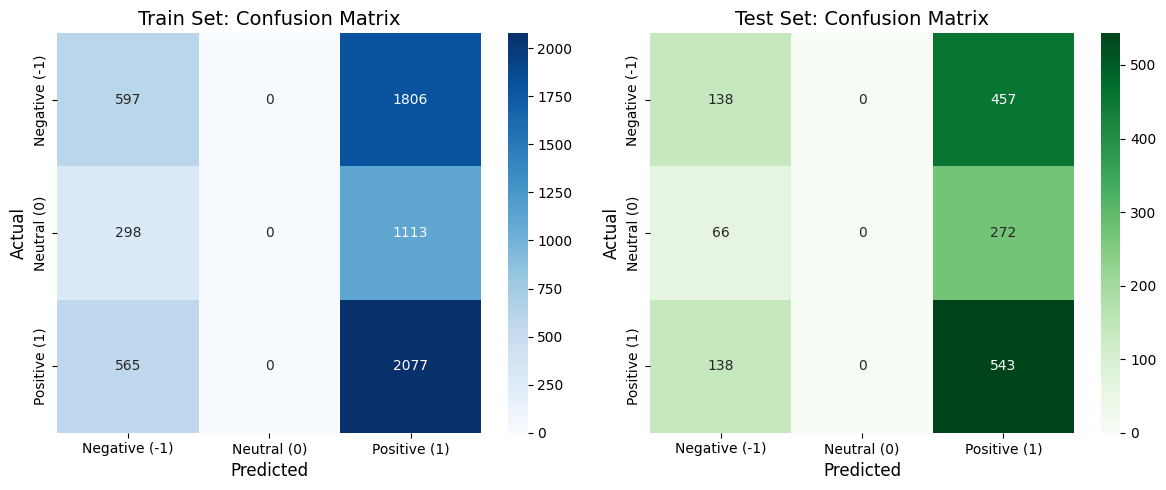

In [41]:
plot_confusion_matrix(y_train, y_train_pred_lr, y_test, y_test_pred_lr)


#### Comment
Maybe the reason why the model has high accuracy is that it consecutively makes bullish(1), which is the major sentiment. But, when looking at other metrices, we see that the precision, recall score, and f1-score is relatively low, suggesting the model provide little value.

### Compare Random Forest Classification and Logistic Regression

In [42]:
# Use RandomForestHelper for evaluation
rf_helper = RandomForestHelper()
train_metrics = rf_helper.evaluate(y_train, y_train_pred_lr)
test_metrics = rf_helper.evaluate(y_test, y_test_pred_lr)

In [43]:
# Make a function for easier usage
def compare_models(y_test_pred,y_test_pred_lr,y_test):
    """Compare Random Forest and Logistic Regression performance."""
    rf_metrics = rf_helper.evaluate(y_test, y_test_pred)
    lr_metrics = rf_helper.evaluate(y_test, y_test_pred_lr)
    
    print("\nModel Comparison:")
    print("Random Forest Metrics:")
    for metric, value in rf_metrics.items():
        print(f"  {metric.capitalize()}: {value:.4f}")
    
    print("\nLogistic Regression Metrics:")
    for metric, value in lr_metrics.items():
        print(f"  {metric.capitalize()}: {value:.4f}")
    
    # Simple comparison logic
    better_model = "Random Forest" if rf_metrics['f1'] > lr_metrics['f1'] else "Logistic Regression"
    print(f"\nBetter performing model (based on F1 score): {better_model}")

In [44]:
# Train dataset comparison
compare_models(y_train_pred, y_train_pred_lr, y_train)


Model Comparison:
Random Forest Metrics:
  Accuracy: 0.7317
  Precision: 0.7590
  Recall: 0.6890
  F1: 0.7022

Logistic Regression Metrics:
  Accuracy: 0.4142
  Precision: 0.2749
  Recall: 0.3449
  F1: 0.2843

Better performing model (based on F1 score): Random Forest


#### Comment: 
Although the accuracy of the Logistic Regression is moderate (41%) but it mainly because it over predicts positive ( this cna be seen throuhg much lower precision score). 
For comparision, the F1-score of Random Forest (70%) is much higher than that of Logistic Regression (28%)

In [45]:
# Test data set comparision
compare_models(y_test_pred, y_test_pred_lr, y_test)


Model Comparison:
Random Forest Metrics:
  Accuracy: 0.4108
  Precision: 0.3683
  Recall: 0.3635
  F1: 0.3572

Logistic Regression Metrics:
  Accuracy: 0.4219
  Precision: 0.2768
  Recall: 0.3431
  F1: 0.2835

Better performing model (based on F1 score): Random Forest


#### Comment
At first sight, the accuracy of logistic regression is higher but the precision, recall, and f1-score is much lower, demonstrating that maybe logistic regression overly predicts bullish (1), which makes the accuracy high.

### Conclusion

The random forest classification is superior to the logistic regression. It achieved higher F1-score in both the training and test set, and extremely higher in the train test. This explores a path for random forest classification with more engineering features and it would have the potential to thrive in the modern financial market world.

# Trading Simulation

To test whether our model has significant implications or not, we need to test it on past data to see if we can really use the model to earn abnormal profit.

Because the stock market always moves up in the long term, taking shorts position is unsafe, espically against the rising tech companies like Mag7 and the future of finance like Bitcoin.

Therefore, my strategy is that

if the predicted_return is 1 ( return >0.5%) --> Long 100% of the capital

if the predicted_return is 0 (neutral) --> Long 50% of the capital and the rest in risk-free asset

if the predicted_return is -1 (return < -0.5%>) --> Short 50% of the capital and buy 150% of capital in risk-free asset

Then, the strategy perfomance is compared with buy and hold the stock itself.

## Helper Function

In [46]:
class TradingSimulator:
    def __init__(self, stock_data=None, risk_free_rate=0.04):
        """
        Initialize TradingSimulator with stock data and risk-free rate.
        
        Parameters:
        - stock_data: DataFrame with stock data (optional)
        - risk_free_rate: Risk-free rate (default 0.04 or 4%)
        """
        self.stock_data = stock_data
        self.risk_free_rate = risk_free_rate

    def simulate_trading(self, stock_data, initial_capital=1000000):
        """
        Simplified trading strategy: Long (1) when signal is 1, half-long (0.5) when 0, 
        half-short (-0.5) when -1, with risk-free rate adjustments.
        
        Parameters:
        - stock_data: DataFrame with columns 'date', 'return', 'predicted_return_class', and 'stock'
        - initial_capital: Starting capital (default $1,000,000)
        
        Returns:
        - results: DataFrame with daily portfolio value, positions, stock returns, and metrics
        """
        # Sort by date and reset index, then drop NaN values
        stock_data = stock_data.sort_values('date').reset_index(drop=True).dropna(subset=['return', 'predicted_return_class'])
        n_days = len(stock_data)
        
        # Initialize variables
        capital = initial_capital
        position = 0  # 1 for long, 0.5 for half-long, -0.5 for half-short, 0 for cash
        portfolio_value = [capital]  # Start with initial capital
        positions = [0]  # Track position (0: cash, 1: long, 0.5: half-long, -0.5: half-short)
        daily_returns = [0]  # Start with initial daily return of 0 to match n_days
        stock_returns = [0]  # Track raw stock returns, starting with 0 to match n_days
        
        # Iterate through each day
        for i in range(n_days):
            current_date = stock_data.loc[i, 'date']
            current_return = stock_data.loc[i, 'return'] if not pd.isna(stock_data.loc[i, 'return']) else 0  # Handle NaN returns
            signal = stock_data.loc[i, 'predicted_return_class']  # -1, 0, or 1
            
            # Track raw stock return
            stock_returns.append(current_return)
            # Trading decisions (simple long/half-long/half-short/cash using returns)
            if signal == 1:  # Long (full position)
                if position != 1:  # Not already long, enter long position
                    position = 1
            elif signal == 0:  # Half-long (half position)
                if position != 0.5:  # Not already half-long, enter half-long position
                    position = 0.5
            elif signal == -1:  # Half-short (half short position)
                if position != -0.5:  # Not already half-short, enter half-short position
                    position = -0.5
            
            # Calculate daily return based on current position and signal
            if position == 1:  # Long position
                daily_return = current_return  # Full return for long (profit from price increase)
            elif position == 0.5:  # Half-long position
                daily_return = 0.5 * current_return  # Half the return for half-long (half profit from price increase)
            elif position == -0.5:  # Half-short position
                daily_return = -0.5 * current_return + (1.5 * self.risk_free_rate / 252)  # Half-short return with risk-free adjustment
            elif position == 0:  # Cash (no position)
                daily_return = self.risk_free_rate / 252  # Earn risk-free rate daily (annualized over 252 days)
            else:
                daily_return = 0  # Default case (should not occur)
            
            # Update capital based on daily return
            capital *= (1 + daily_return)
            
            
            
            # Calculate daily portfolio value (just capital, since no position value needed)
            daily_value = capital
            portfolio_value.append(daily_value)
            
            # Track position for reporting
            positions.append(position)
            
            # Update daily_returns (already calculated above)
            daily_returns.append(daily_return)
        
        # Trim portfolio_value, positions, daily_returns, and stock_returns to match stock_data length (remove initial value)
        portfolio_value = portfolio_value[1:]  # Remove initial capital to match n_days
        positions = positions[1:]  # Remove initial position to match n_days
        daily_returns = daily_returns[1:]  # Remove initial 0 to match n_days
        stock_returns = stock_returns[1:]  # Remove initial 0 to match n_days
        
        # Verify lengths match
        assert len(portfolio_value) == n_days, f"Portfolio value length {len(portfolio_value)} does not match stock_data length {n_days}"
        assert len(positions) == n_days, f"Positions length {len(positions)} does not match stock_data length {n_days}"
        assert len(daily_returns) == n_days, f"Daily returns length {len(daily_returns)} does not match stock_data length {n_days}"
        assert len(stock_returns) == n_days, f"Stock returns length {len(stock_returns)} does not match stock_data length {n_days}"
        
        # Create results DataFrame with aligned lengths, including stock_return
        results = pd.DataFrame({
            'date': stock_data['date'],
            'signal': stock_data['predicted_return_class'],
            'position': positions,
            'portfolio_value': portfolio_value,
            'daily_return': daily_returns,
            'stock_return': stock_returns
        })
        
        return results
    
    def calculate_max_drawdown(self, values):
        """
        Calculate the maximum drawdown for a series of values.
        
        Parameters:
        - values: List, numpy array, or pandas Series of values (e.g., portfolio values or returns)
        
        Returns:
        - max_drawdown: Maximum drawdown value (positive percentage, e.g., 0.25 for 25%)
        """
        import numpy as np
        import pandas as pd

        # Handle None or empty input explicitly
        if values is None or (isinstance(values, (pd.Series, np.ndarray, list)) and len(values) == 0):
            return 0.0

        # Convert to numpy array, handling pandas Series or other iterable types
        if isinstance(values, pd.Series):
            # Drop NaN values and convert to numpy array, ensuring numeric data
            values = values.dropna().values
            if len(values) == 0:
                return 0.0
        elif isinstance(values, (list, tuple)):
            values = np.array(values)
        else:
            values = np.array(values)

        # Ensure we have valid numeric data
        if len(values) == 0 or not np.isfinite(values).any():
            return 0.0

        # Calculate cumulative returns (or use raw values if they represent prices)
        try:
            cumulative_returns = (1 + values).cumprod()
        except:
            return 0.0  # Handle any potential numerical errors

        # Find the running maximum (peak) up to each point
        running_max = np.maximum.accumulate(cumulative_returns)

        # Calculate drawdown as the percentage drop from the running maximum
        # Drawdown = (current_value - peak) / peak
        drawdown = (cumulative_returns - running_max) / running_max

        # The maximum drawdown is the most negative value (converted to positive percentage)
        max_drawdown = -drawdown.min() if not np.isnan(drawdown.min()) else 0.0

        # Ensure the result is a percentage (between 0 and 1 for typical drawdown)
        return max_drawdown if 0 <= max_drawdown <= 1 else 0.0
        
    def evaluate_performance(self, results, trading_days=252, years=4, risk_free_rate=0.04):
        """
        Evaluate trading performance metrics for both portfolio and stock returns.
        
        Parameters:
        - portfolio_values: List or array of daily portfolio values
        - stock_returns: List or array of daily stock returns
        - trading_days: Number of trading days per year (default 252)
        - years: Number of years for annualized return (default 4)
        - risk_free_rate: Risk-free rate (default 0.04 or 4%)
        
        Returns:
        - metrics_df: DataFrame with metrics for portfolio and stock
        """
        # Convert inputs to pandas Series
        portfolio_values = pd.Series(results["portfolio_value"].values)
        daily_return= pd.Series(results["daily_return"].values)
        stock_returns = pd.Series(results["stock_return"].values)
        n_days = len(portfolio_values)
        
        # Calculate daily returns for both portfolio and stock
        portfolio_daily_returns = portfolio_values.pct_change().dropna().values
        stock_daily_returns = stock_returns.dropna().values
        
        # Total return (cumulative return from start to end)
        portfolio_total_return = (portfolio_values.iloc[-1] - portfolio_values.iloc[0]) / portfolio_values.iloc[0]
        stock_total_return = (1 + stock_daily_returns).prod() - 1 if len(stock_daily_returns) > 0 else 0
        
        # Annualized return (assuming 'years' years of data)
        portfolio_annualized_return = (1 + portfolio_total_return) ** (1 / years) - 1
        stock_annualized_return = (1 + stock_total_return) ** (1 / years) - 1 if stock_total_return != 0 else 0
        
        # Standard deviation (annualized over trading_days)
        portfolio_std = np.std(portfolio_daily_returns) * np.sqrt(trading_days) if len(portfolio_daily_returns) > 0 else 0
        stock_std = np.std(stock_daily_returns) * np.sqrt(trading_days) if len(stock_daily_returns) > 0 else 0
        
        # Sharpe ratio (annualized, (mean - risk_free_rate) / std)
        portfolio_sharpe = (portfolio_annualized_return - risk_free_rate) / portfolio_std if portfolio_std > 0 else 0
        stock_sharpe = (stock_annualized_return - risk_free_rate) / stock_std if stock_std > 0 else 0
        
        # Maximum drawdown using the instance method
        portfolio_max_drawdown = self.calculate_max_drawdown(daily_return)
        stock_max_drawdown = self.calculate_max_drawdown(stock_returns)  # Scale stock returns to initial capital for consistency
        
        # Create a DataFrame for metrics
        metrics_df = pd.DataFrame({
            'Metric': ['Total Return', 'Annualized Return', 'Standard Deviation', 'Sharpe Ratio', 'Maximum Drawdown'],
            'Portfolio': [f"{portfolio_total_return*100:.2f}%", f"{portfolio_annualized_return*100:.2f}%", f"{portfolio_std*100:.2f}%", f"{portfolio_sharpe:.2f}", f"{portfolio_max_drawdown*100:.2f}%"],
            'Stock': [f"{stock_total_return*100:.2f}%", f"{stock_annualized_return*100:.2f}%", f"{stock_std*100:.2f}%", f"{stock_sharpe:.2f}", f"{stock_max_drawdown*100:.2f}%"]
        })
        
        return metrics_df

    def plot_results(self, results, stock_name):
        """
        Plot portfolio value over time and cumulative return of the stock itself, starting at 1,
        displaying only 10 selected days on the x-axis, and showing train/test split (80%/20%).
        
        Parameters:
        - results: DataFrame with columns 'date', 'portfolio_value', and 'stock_return' for portfolio
        - stock_name: Name of the stock for labeling the plot
        """
        plt.figure(figsize=(12, 6))
        
        # Ensure 'date' column is in datetime format
        if not pd.api.types.is_datetime64_any_dtype(results['date']):
            results['date'] = pd.to_datetime(results['date'])
        
        # Normalize portfolio value and stock cumulative return to start at 1
        portfolio_normalized = results['portfolio_value'] / results['portfolio_value'].iloc[0]
        stock_cumulative_return = (1 + results['stock_return']).cumprod()
        
        # Plot normalized portfolio value
        plt.plot(results['date'], portfolio_normalized, label=f'Portfolio Value ({stock_name})', color='blue')
        
        # Plot normalized stock cumulative return
        plt.plot(results['date'], stock_cumulative_return, 
                 label=f'Stock Cumulative Return ({stock_name})', color='green', linestyle='--')
        
        # Calculate the 80%/20% split point (training/test split)
        n_days = len(results)
        
        # Select 10 evenly spaced dates for x-axis
        n_points = 10
        if n_days > n_points:
            indices = np.linspace(0, n_days - 1, n_points, dtype=int)
            selected_dates = [results['date'].iloc[i] for i in indices]
            # Ensure selected_dates are datetime objects and format for xticks
            date_labels = [date.strftime('%Y-%m-%d') if pd.api.types.is_datetime64_any_dtype(date) else str(date) for date in selected_dates]
            plt.xticks(selected_dates, date_labels, rotation=45)
        else:
            date_labels = [date.strftime('%Y-%m-%d') if pd.api.types.is_datetime64_any_dtype(date) else str(date) for date in results['date']]
            plt.xticks(results['date'], date_labels, rotation=45)
        
        plt.title(f'Normalized Portfolio Value and Stock Cumulative Return Over Time for {stock_name}', fontsize=14)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel('Normalized Value (Starting at 1)', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

## Random Forest Evaluation

In [47]:
# Make predictions for the entire dataset (not just train/test) for trading simulation
data_clean = merged_df.copy()  # Ensure we have the original data with all columns
data_clean.loc[:, 'predicted_return_class'] = best_pipeline.predict(X)


Trading Simulation Results for BTC:
            Metric Portfolio   Stock
      Total Return   248.17% 116.48%
 Annualized Return    36.60%  21.30%
Standard Deviation    45.34%  56.98%
      Sharpe Ratio      0.72    0.30
  Maximum Drawdown    49.95%  74.11%


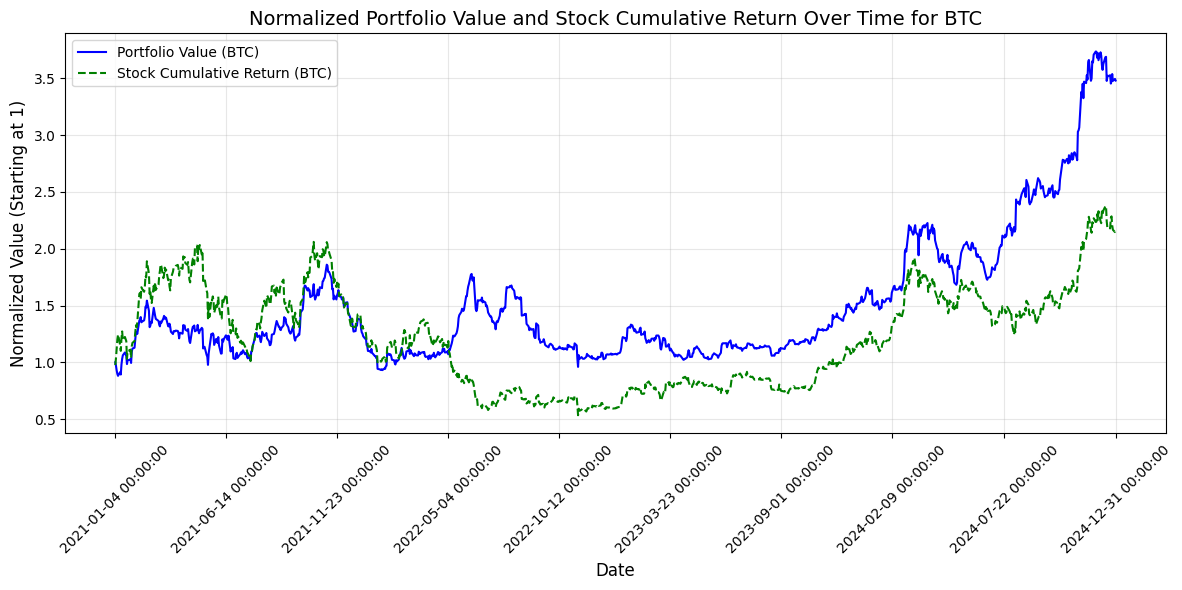


Trading Simulation Results for AAPL:
            Metric Portfolio  Stock
      Total Return    20.14% 97.89%
 Annualized Return     4.69% 18.61%
Standard Deviation    20.92% 26.58%
      Sharpe Ratio      0.03   0.55
  Maximum Drawdown    32.96% 30.91%


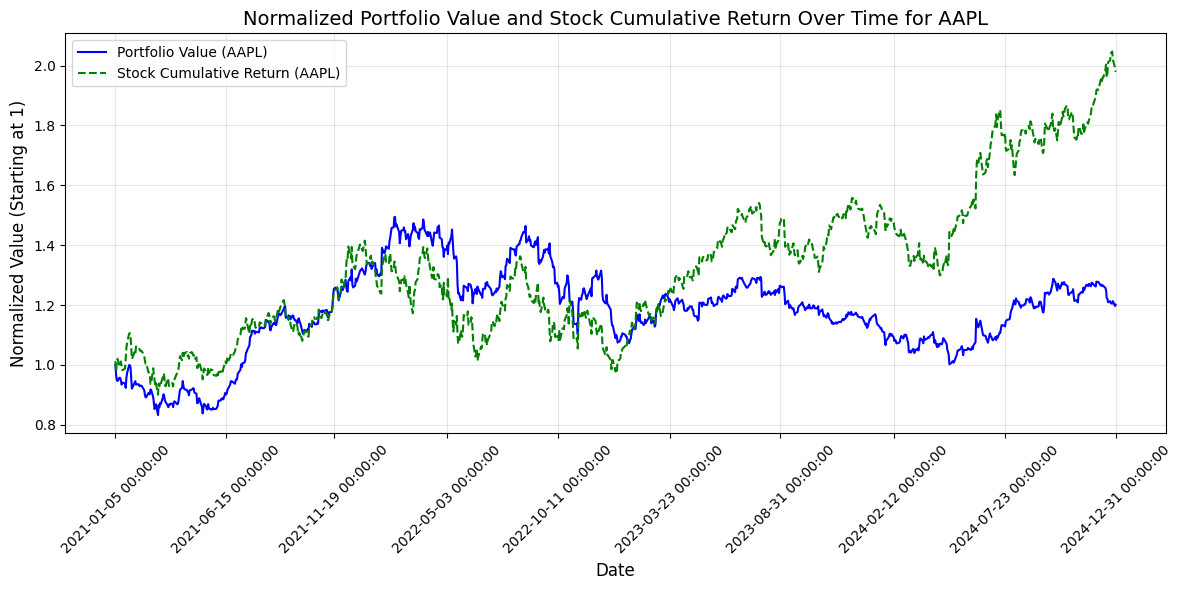


Trading Simulation Results for MSFT:
            Metric Portfolio   Stock
      Total Return    47.07% 100.31%
 Annualized Return    10.12%  18.97%
Standard Deviation    21.02%  26.06%
      Sharpe Ratio      0.29    0.57
  Maximum Drawdown    32.35%  37.15%


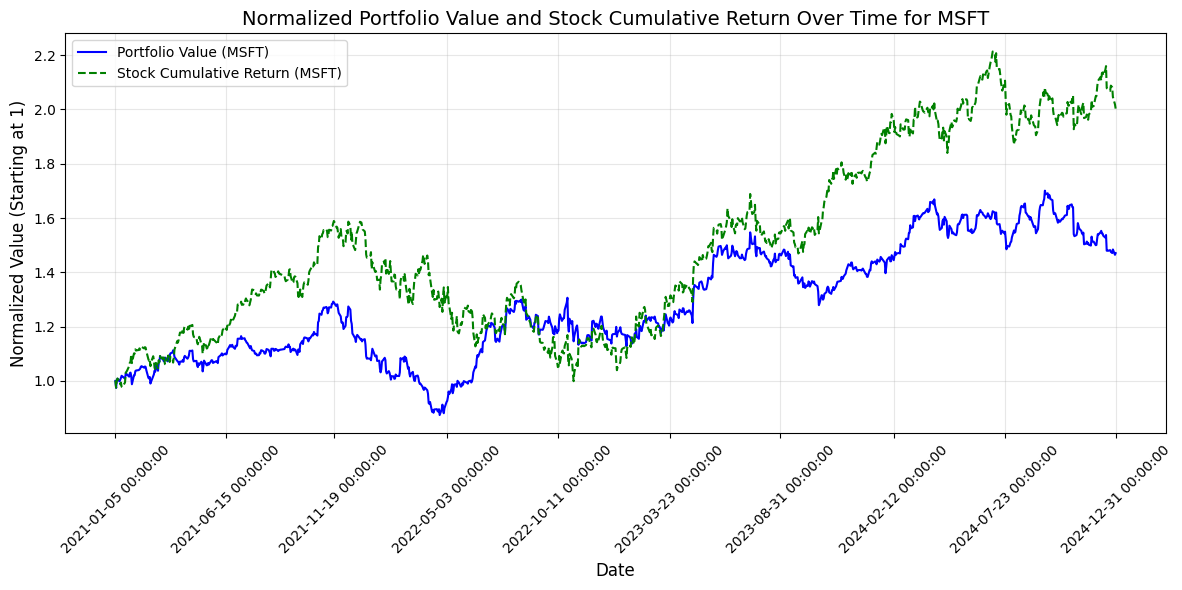


Trading Simulation Results for GOOGL:
            Metric Portfolio   Stock
      Total Return    46.14% 120.13%
 Annualized Return     9.95%  21.81%
Standard Deviation    23.83%  30.83%
      Sharpe Ratio      0.25    0.58
  Maximum Drawdown    25.28%  44.32%


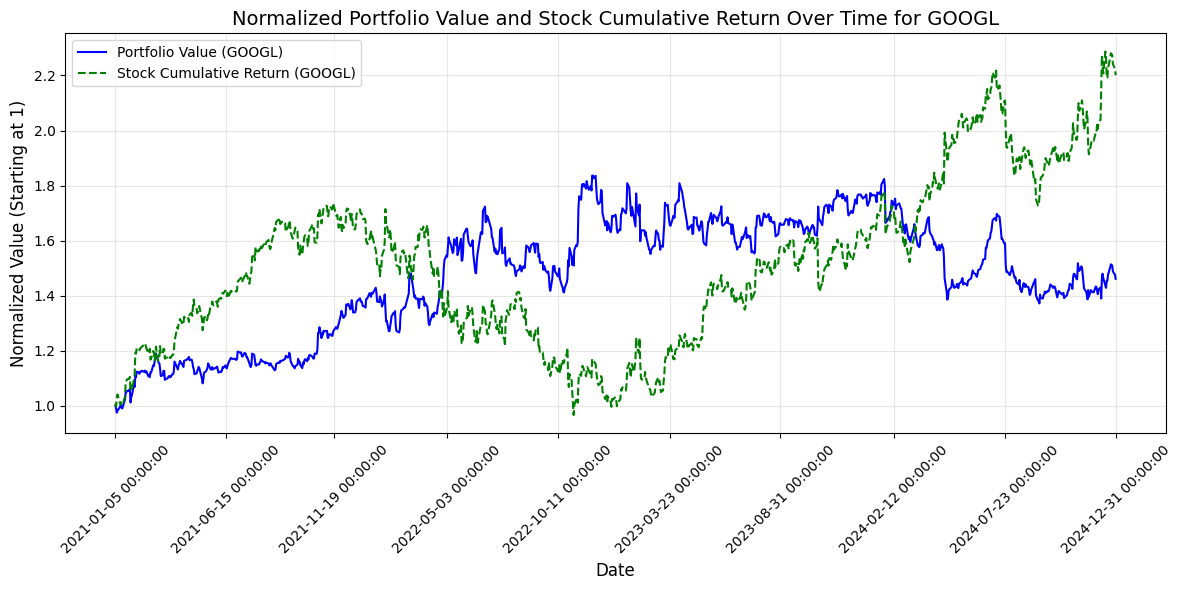


Trading Simulation Results for AMZN:
            Metric Portfolio  Stock
      Total Return    14.25% 37.69%
 Annualized Return     3.39%  8.33%
Standard Deviation    28.15% 35.27%
      Sharpe Ratio     -0.02   0.12
  Maximum Drawdown    39.95% 56.15%


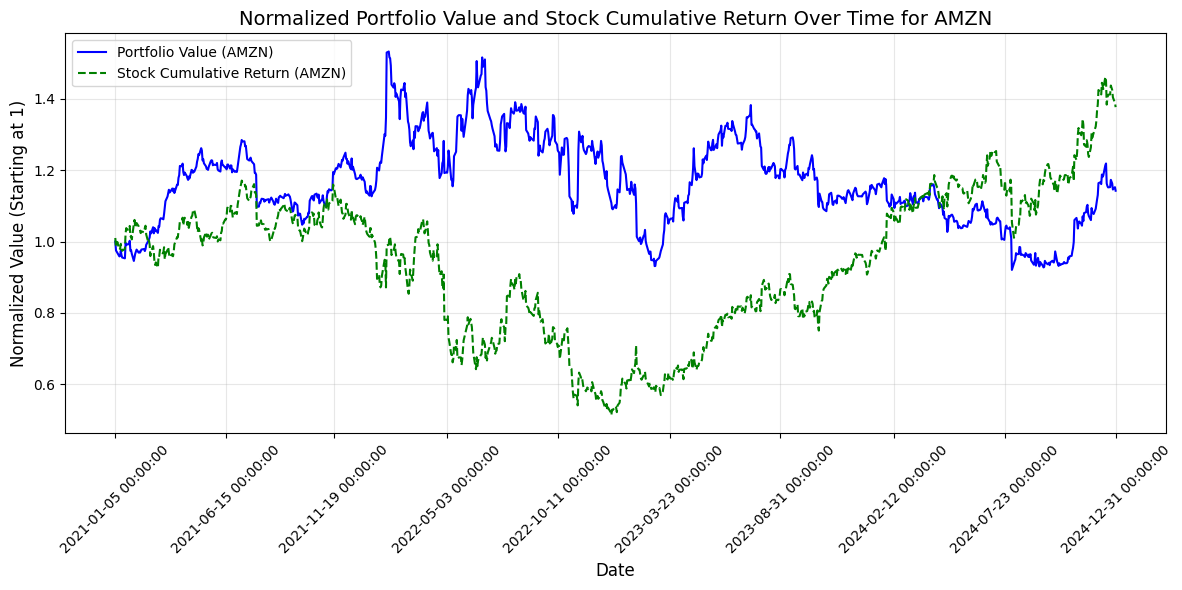


Trading Simulation Results for NVDA:
            Metric Portfolio   Stock
      Total Return    37.73% 926.66%
 Annualized Return     8.33%  79.00%
Standard Deviation    43.58%  52.85%
      Sharpe Ratio      0.10    1.42
  Maximum Drawdown    62.15%  66.34%


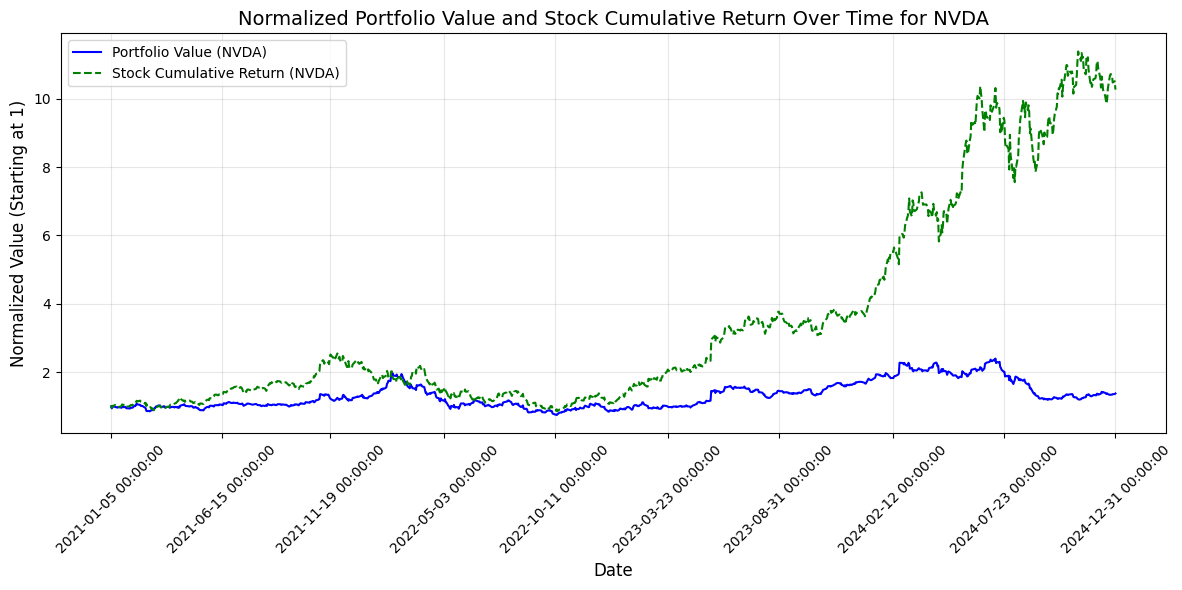


Trading Simulation Results for META:
            Metric Portfolio   Stock
      Total Return    13.77% 118.54%
 Annualized Return     3.28%  21.59%
Standard Deviation    34.92%  44.65%
      Sharpe Ratio     -0.02    0.39
  Maximum Drawdown    53.72%  76.74%


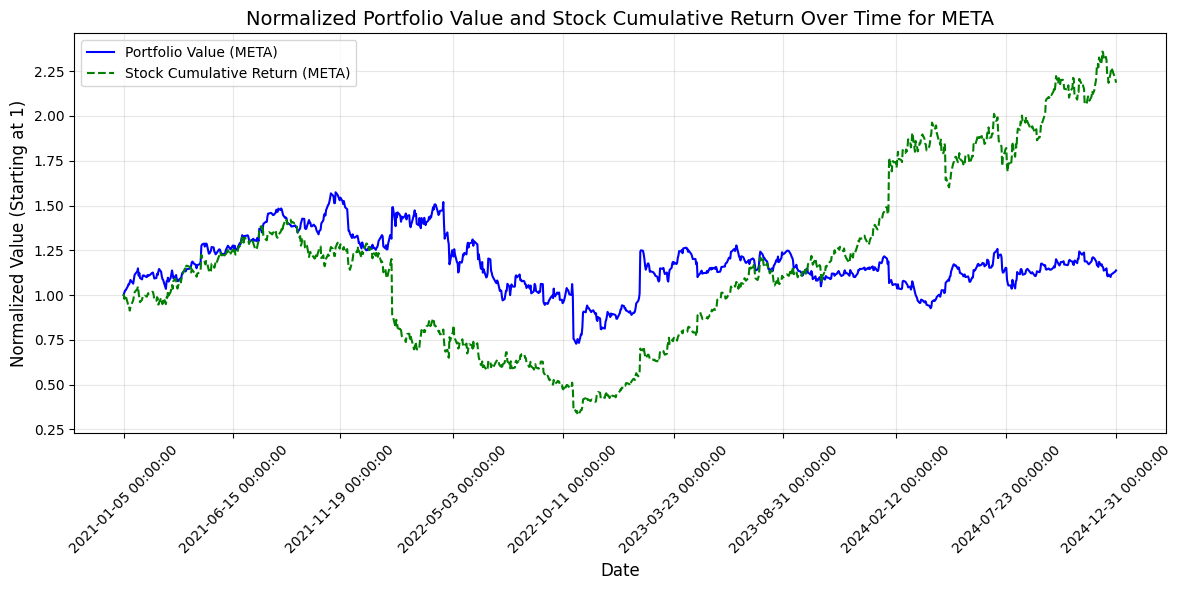


Trading Simulation Results for TSLA:
            Metric Portfolio  Stock
      Total Return   -34.04% 66.01%
 Annualized Return    -9.88% 13.51%
Standard Deviation    48.08% 60.03%
      Sharpe Ratio     -0.29   0.16
  Maximum Drawdown    70.79% 73.63%


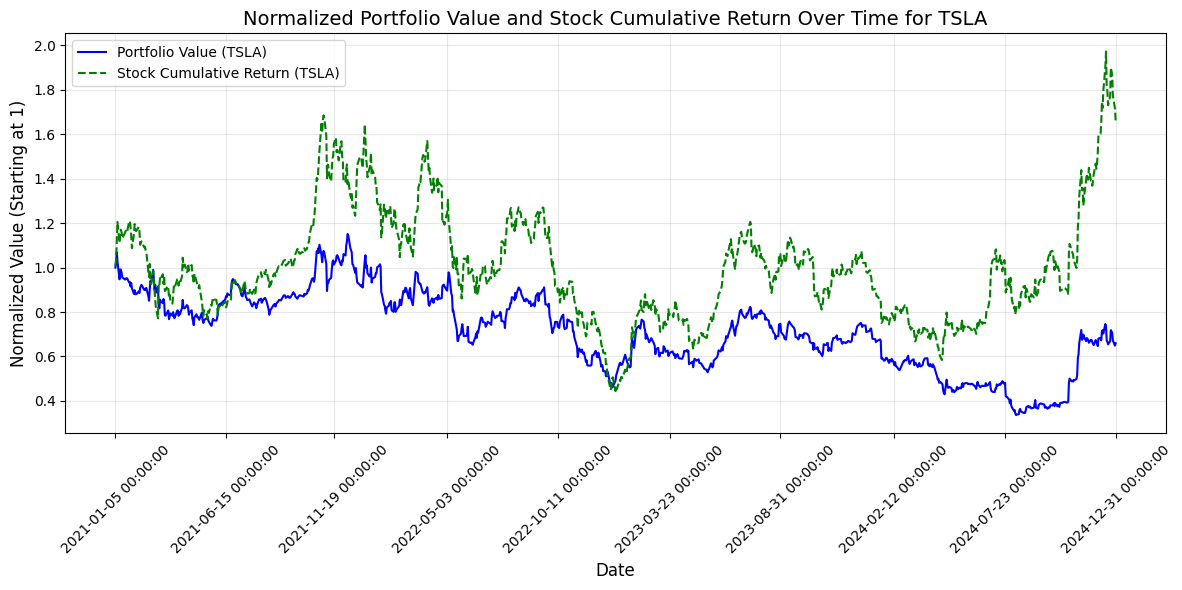

In [48]:
trader = TradingSimulator(risk_free_rate=0.04)  # Initialize with default risk-free rate
unique_stocks = data_clean['stock'].unique()
all_results = {}
all_metrics = {}

for stock in unique_stocks:
    stock_data = data_clean[data_clean['stock'] == stock].copy()
    results = trader.simulate_trading(stock_data)
    all_results[stock] = results
    
    # Evaluate performance using the portfolio values and stock returns
    metrics_df = trader.evaluate_performance(results)
    all_metrics[stock] = metrics_df
    
    print(f"\nTrading Simulation Results for {stock}:")
    print(metrics_df.to_string(index=False))  # Print metrics table without index
    
    # Plot results
    trader.plot_results(results, stock)

### Comment

Sadly, the strategy only outperforms on BTC, and hugely underforms on mag7 stocks.

There can be 2 main reasons: first is the how the sentiment is constructed ( is Textblob score accurate, is the threshold for seperating bullish, neutral and bearish good) and the way stock returns are grouped into -1,0,1 (-0.5%-0-0.5%).

For that reason, there need to be further researchs and developments to make the model better.

C:\Users\caoqu\AppData\Local\Temp\ipykernel_16268\2473135869.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




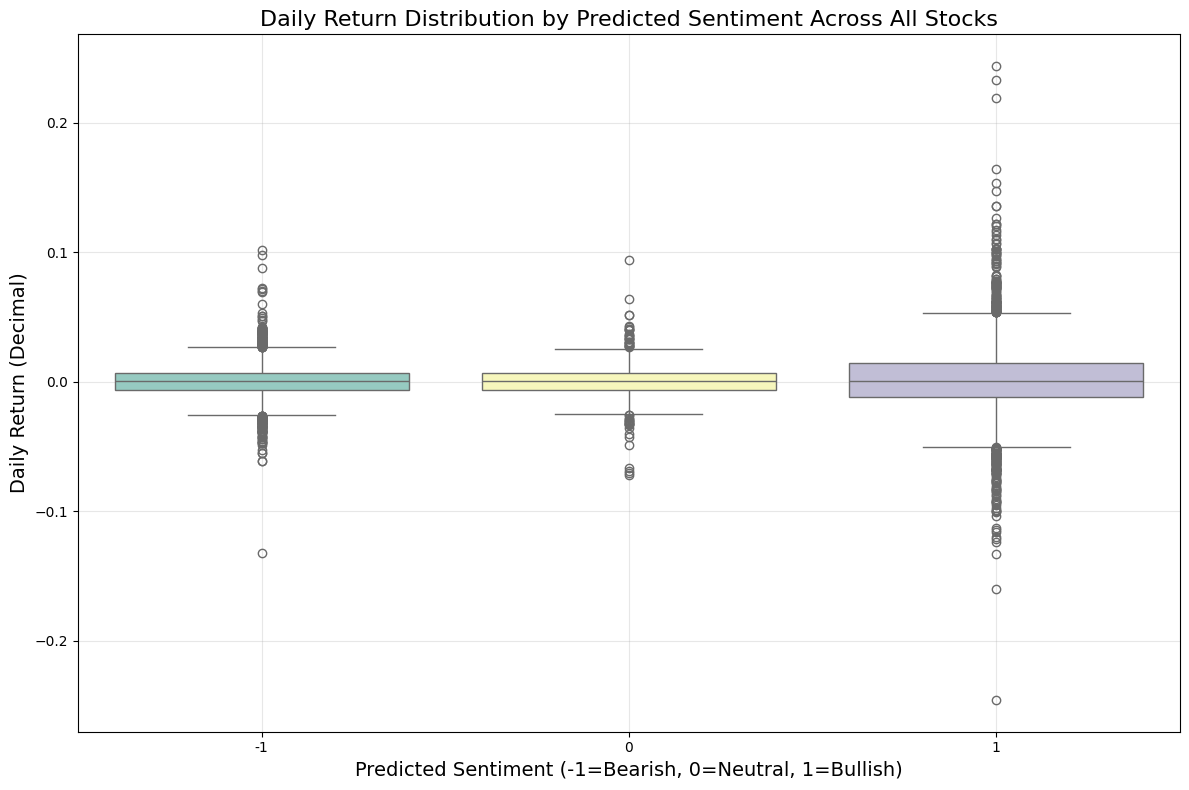

In [49]:
# Calculate daily_return based on predicted_return_class
data_clean['daily_return'] = np.where(
    data_clean['predicted_return_class'] == 1,
    data_clean['return'] * 1,  # predicted = 1: return * 1
    np.where(
        data_clean['predicted_return_class'] == 0,
        data_clean['return'] * 0.5 ,  # predicted = 0: return * 0.5 * 0 = 0
        data_clean['return'] * -0.5 * -1  # predicted = -1: return * -0.5 * -1 = return * 0.5
    )
)

# Create box plot for daily_return vs. predicted_return_class across all stocks
plt.figure(figsize=(12, 8))
sns.boxplot(x='predicted_return_class', y='daily_return', data=data_clean, palette='Set3')
plt.title('Daily Return Distribution by Predicted Sentiment Across All Stocks', fontsize=16)
plt.xlabel('Predicted Sentiment (-1=Bearish, 0=Neutral, 1=Bullish)', fontsize=14)
plt.ylabel('Daily Return (Decimal)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

#### Comment

Whatever the predicted sentiment is, there is likely equal chance of getting profit or loss.

## Logistic Regression Trading Simulation

In [50]:
# Transform
X_lr=X.copy()
X_lr = preprocessor.transform(X_lr)
X_lr=X_lr.tolist()

In [51]:
data_clean=merged_df
data_clean.loc[:, 'predicted_return_class'] = lr.predict(X_lr)


Trading Simulation Results for BTC:
            Metric Portfolio   Stock
      Total Return    24.97% 116.48%
 Annualized Return     5.73%  21.30%
Standard Deviation    51.60%  56.98%
      Sharpe Ratio      0.03    0.30
  Maximum Drawdown    80.85%  74.11%


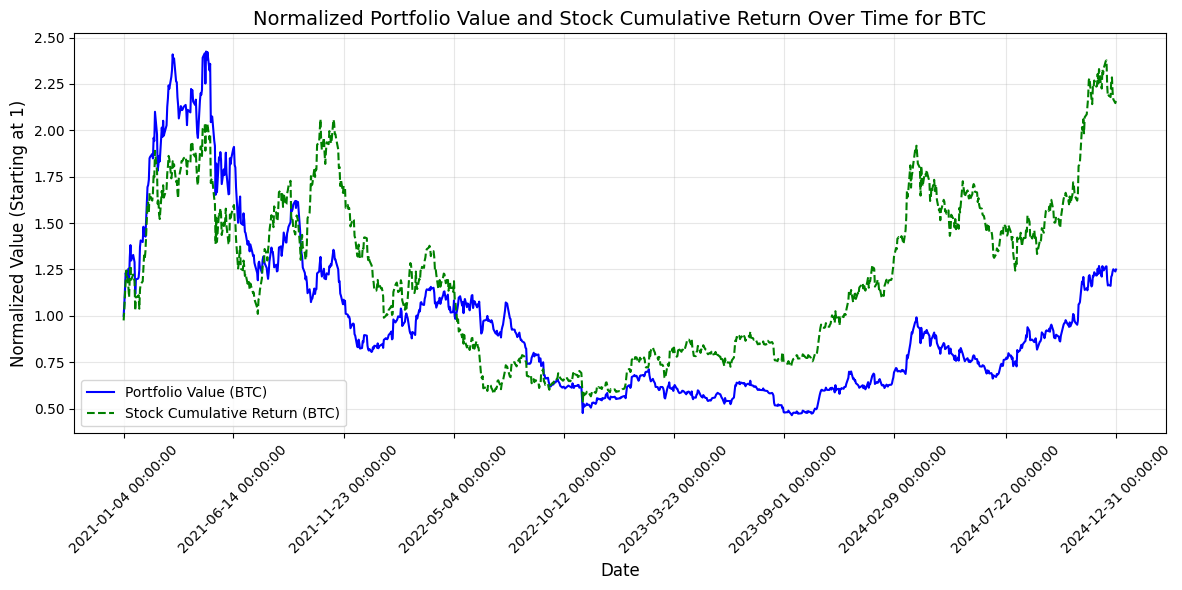


Trading Simulation Results for AAPL:
            Metric Portfolio  Stock
      Total Return    49.72% 97.89%
 Annualized Return    10.62% 18.61%
Standard Deviation    24.34% 26.58%
      Sharpe Ratio      0.27   0.55
  Maximum Drawdown    37.30% 30.91%


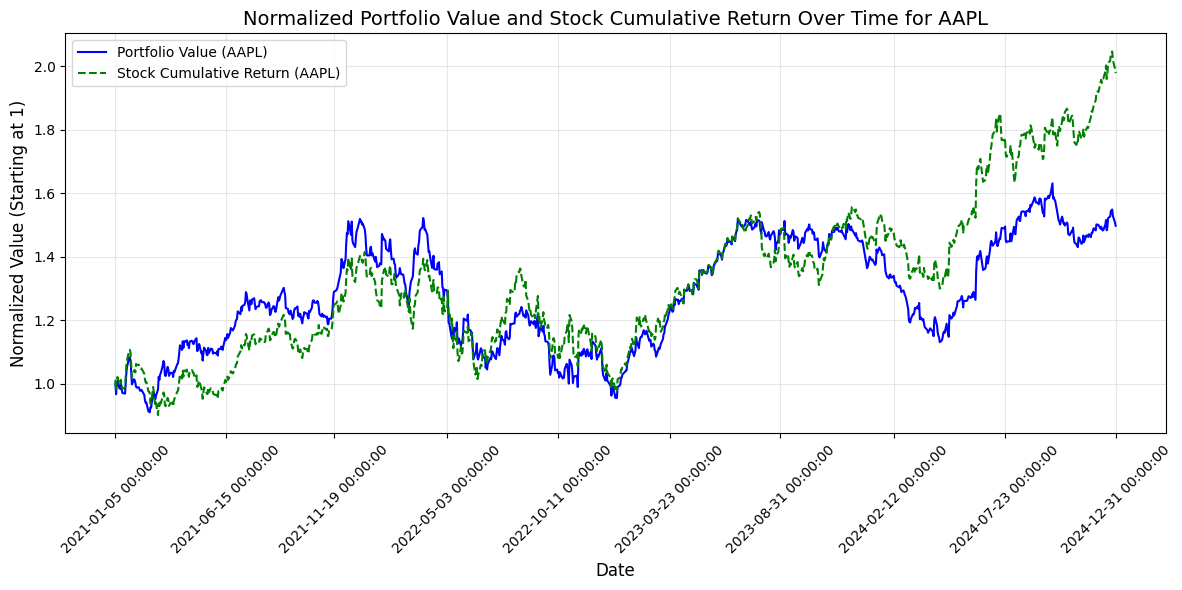


Trading Simulation Results for MSFT:
            Metric Portfolio   Stock
      Total Return    18.33% 100.31%
 Annualized Return     4.30%  18.97%
Standard Deviation    24.37%  26.06%
      Sharpe Ratio      0.01    0.57
  Maximum Drawdown    46.89%  37.15%


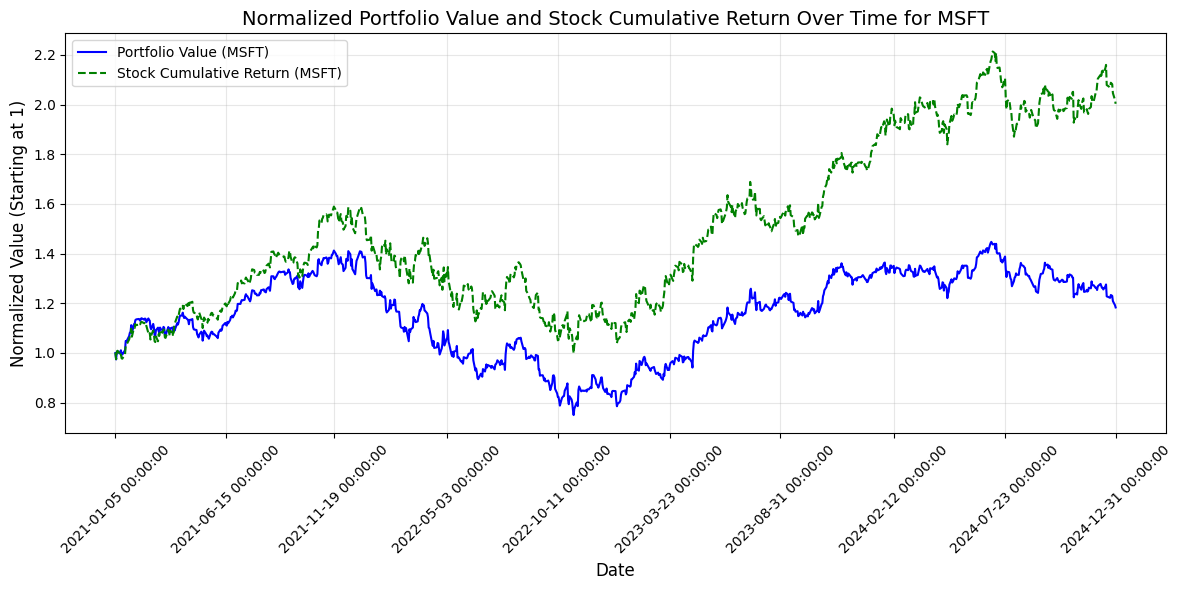


Trading Simulation Results for GOOGL:
            Metric Portfolio   Stock
      Total Return    32.18% 120.13%
 Annualized Return     7.22%  21.81%
Standard Deviation    27.55%  30.83%
      Sharpe Ratio      0.12    0.58
  Maximum Drawdown    57.03%  44.32%


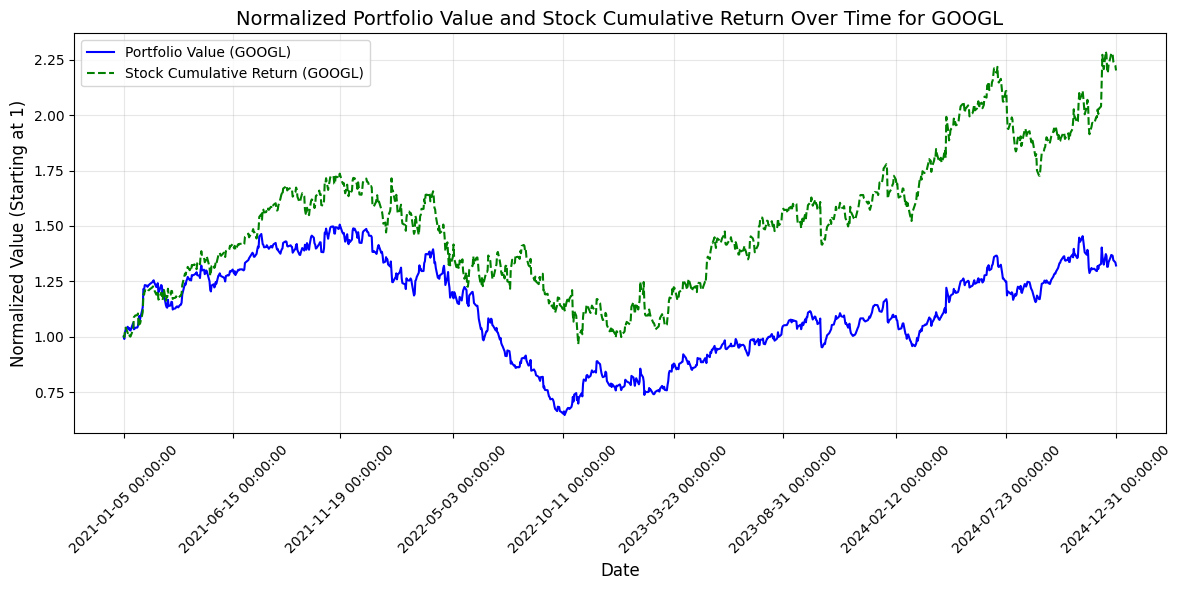


Trading Simulation Results for AMZN:
            Metric Portfolio  Stock
      Total Return    36.71% 37.69%
 Annualized Return     8.13%  8.33%
Standard Deviation    32.30% 35.27%
      Sharpe Ratio      0.13   0.12
  Maximum Drawdown    52.08% 56.15%


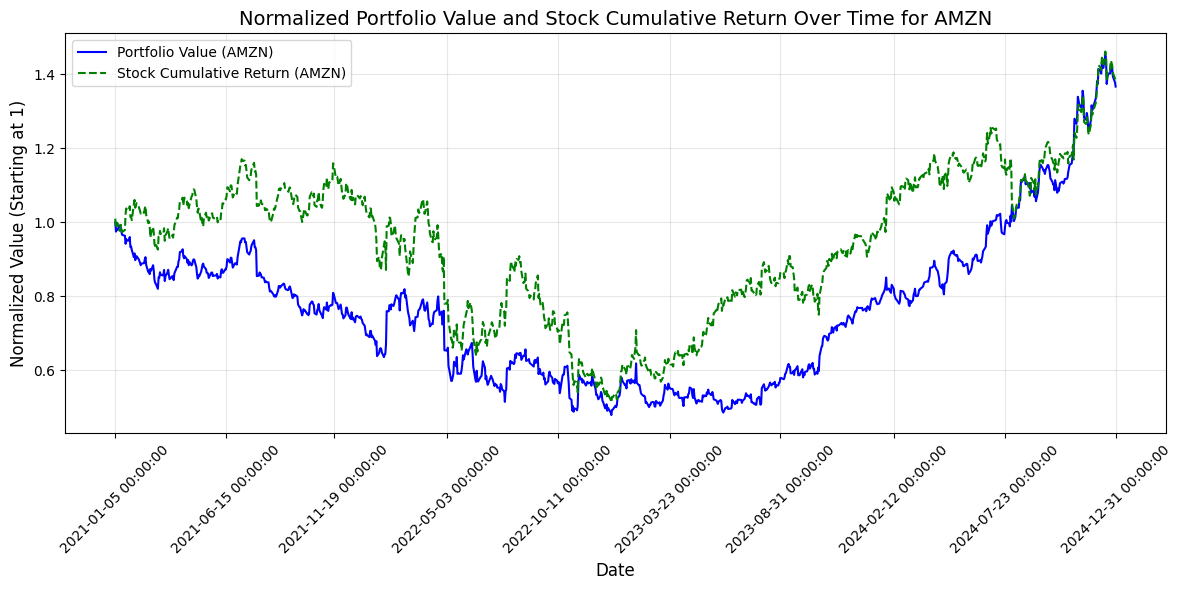


Trading Simulation Results for NVDA:
            Metric Portfolio   Stock
      Total Return   216.60% 926.66%
 Annualized Return    33.39%  79.00%
Standard Deviation    48.25%  52.85%
      Sharpe Ratio      0.61    1.42
  Maximum Drawdown    57.34%  66.34%


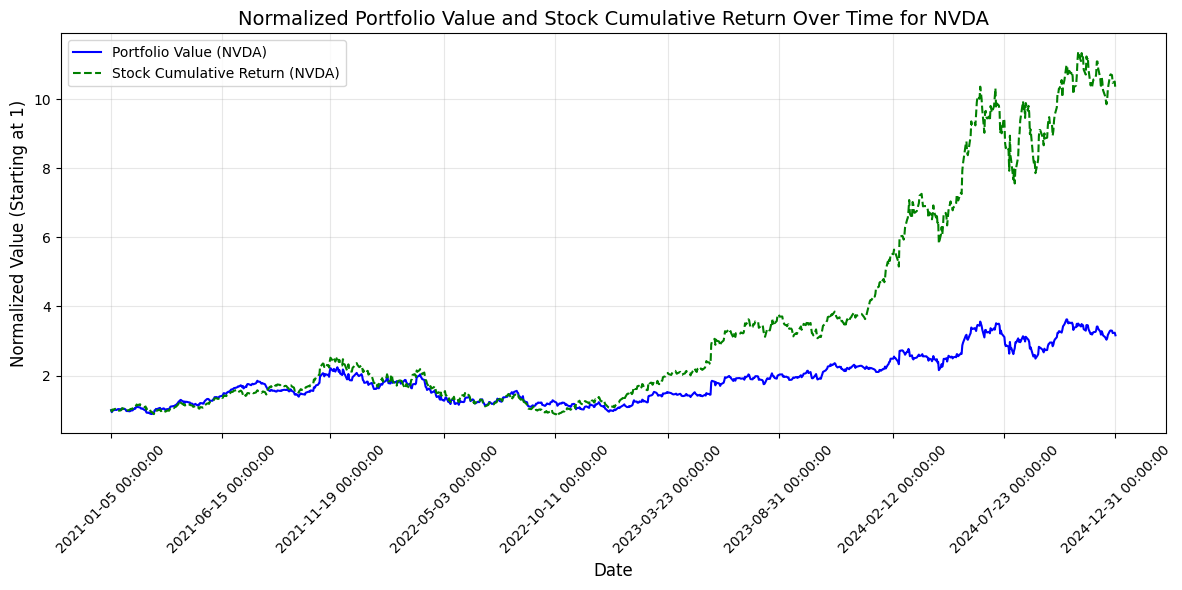


Trading Simulation Results for META:
            Metric Portfolio   Stock
      Total Return    -7.78% 118.54%
 Annualized Return    -2.01%  21.59%
Standard Deviation    37.98%  44.65%
      Sharpe Ratio     -0.16    0.39
  Maximum Drawdown    62.58%  76.74%


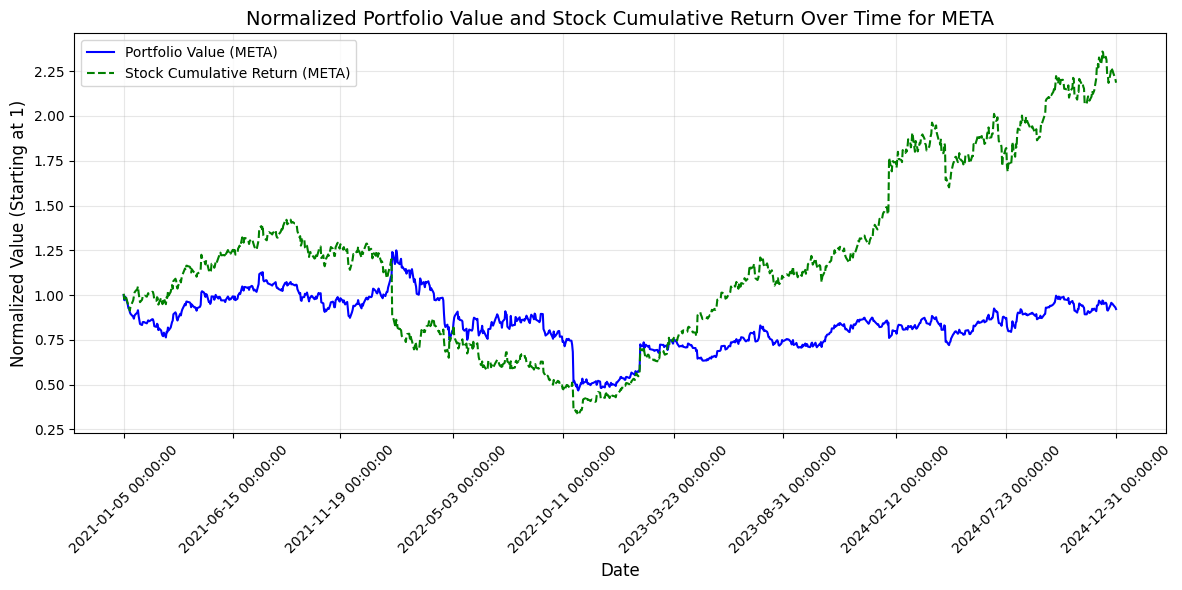


Trading Simulation Results for TSLA:
            Metric Portfolio  Stock
      Total Return   166.99% 66.01%
 Annualized Return    27.83% 13.51%
Standard Deviation    55.69% 60.03%
      Sharpe Ratio      0.43   0.16
  Maximum Drawdown    69.60% 73.63%


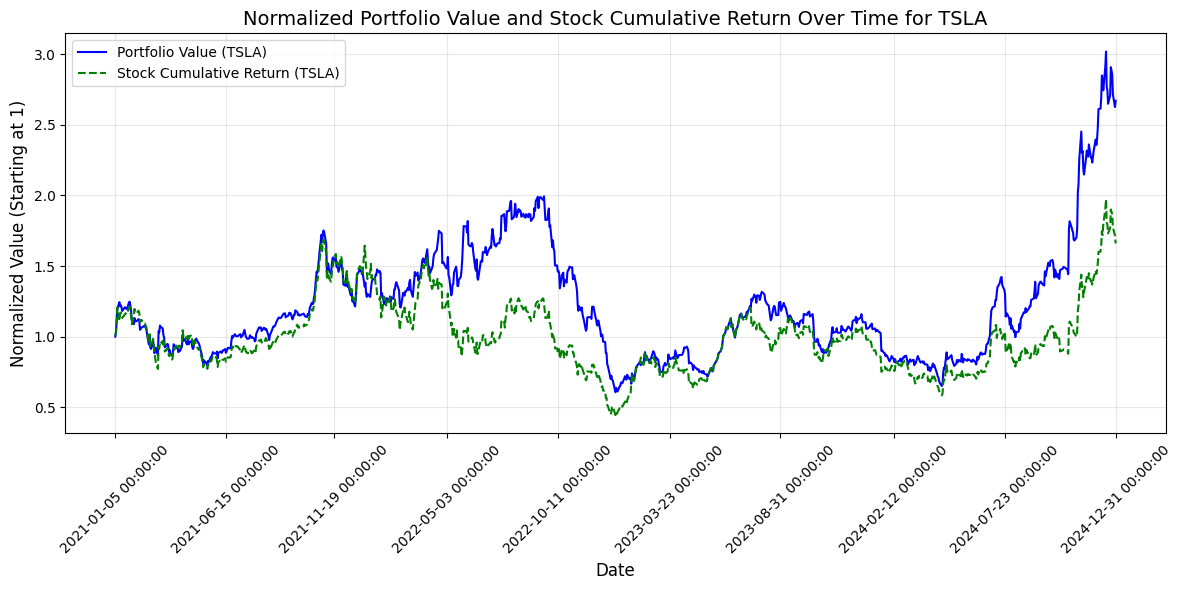

In [52]:
trader = TradingSimulator(risk_free_rate=0.04)  # Initialize with default risk-free rate
unique_stocks = data_clean['stock'].unique()
all_results = {}
all_metrics = {}

for stock in unique_stocks:
    stock_data = data_clean[data_clean['stock'] == stock].copy()
    results = trader.simulate_trading(stock_data)
    all_results[stock] = results
    
    # Evaluate performance using the portfolio values and stock returns
    metrics_df = trader.evaluate_performance(results)
    all_metrics[stock] = metrics_df
    
    print(f"\nTrading Simulation Results for {stock}:")
    print(metrics_df.to_string(index=False))  # Print metrics table without index
    
    # Plot results
    trader.plot_results(results, stock)

### Comment:
Suprisingly, the strategy outperform TSLA stocks but not other stocks and BTC. Maybe it is due to the fast changing nature of TSLA that the strategy can somewhat capture.

C:\Users\caoqu\AppData\Local\Temp\ipykernel_16268\2473135869.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




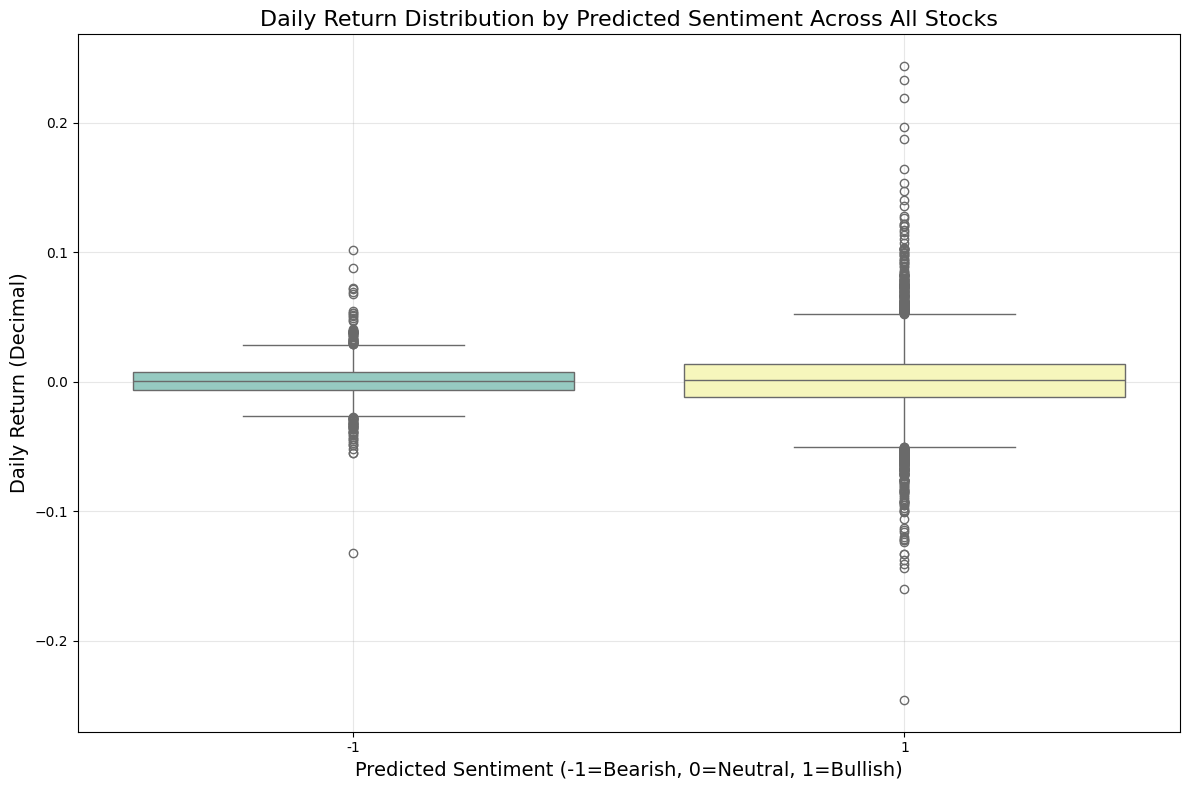

In [53]:
# Calculate daily_return based on predicted_return_class
data_clean['daily_return'] = np.where(
    data_clean['predicted_return_class'] == 1,
    data_clean['return'] * 1,  # predicted = 1: return * 1
    np.where(
        data_clean['predicted_return_class'] == 0,
        data_clean['return'] * 0.5 ,  # predicted = 0: return * 0.5 * 0 = 0
        data_clean['return'] * -0.5 * -1  # predicted = -1: return * -0.5 * -1 = return * 0.5
    )
)

# Create box plot for daily_return vs. predicted_return_class across all stocks
plt.figure(figsize=(12, 8))
sns.boxplot(x='predicted_return_class', y='daily_return', data=data_clean, palette='Set3')
plt.title('Daily Return Distribution by Predicted Sentiment Across All Stocks', fontsize=16)
plt.xlabel('Predicted Sentiment (-1=Bearish, 0=Neutral, 1=Bullish)', fontsize=14)
plt.ylabel('Daily Return (Decimal)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

# Conclusion

Sentimeent Analysis prove to be an effective alpha in the stock market, in which it has the power to predict stock movements. Significantly, the number of articles is the most important factor, next to the percentage of each type (bullish, bearish, neutral). Maybe getting more data into the model would resolves the overfit problem and can potentially generate abnormal return in the market.

Further research will provided a lot insight about the model, which has huge potential in the Vietnamese stock market.

# Reference

https://hungha11.github.io/thefinEngineer.github.io/posts/2025/2025-02-03-llm-portfolio-optimization/